# Plot Training Data

Import packages

In [1]:
from packaging import version

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorboard as tb
import os
from sklearn.metrics import mean_squared_error

import scienceplots

mpl.rc_file_defaults()
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["legend.edgecolor"] = 'black'
plt.rc('legend', fontsize=10)



def cleanData(data):
    # Multiply z to be positive upwards
    data.loc[:, "z"] *= -1
    # Convert angles to degrees
    data.loc[:, ["phi", "theta", "psi"]] *= 180 / np.pi
    return data

def post_process(data,
              real_values=(0, 0, 5, 0, 0),
              cols=('x', 'y', 'z', 'phi', 'theta'),
              z_settling_time=0,
              ):
    # Compute the RMSE for each column
    for i, col in enumerate(cols):
        pred = data[col]

        if col == 'z':
            pred = data.query('real_time >= @z_settling_time')[col]
            z_sse = pred.mean() - real_values[i]
            print(f'SSE for {col}: {z_sse:.5f}')

        # Get the predicted values and compute the RMSE
        true = real_values[i] * np.ones(len(pred))
        rmse = mean_squared_error(true, pred, squared=False)

        # Print the RMSE
        print(f'RMSE for {col}: {rmse:.5f}')

NEW SINGLE PLOTS

---

Plot Specific Run - 6 Plots

Getting Data
Cleaning Data
Plotting Data


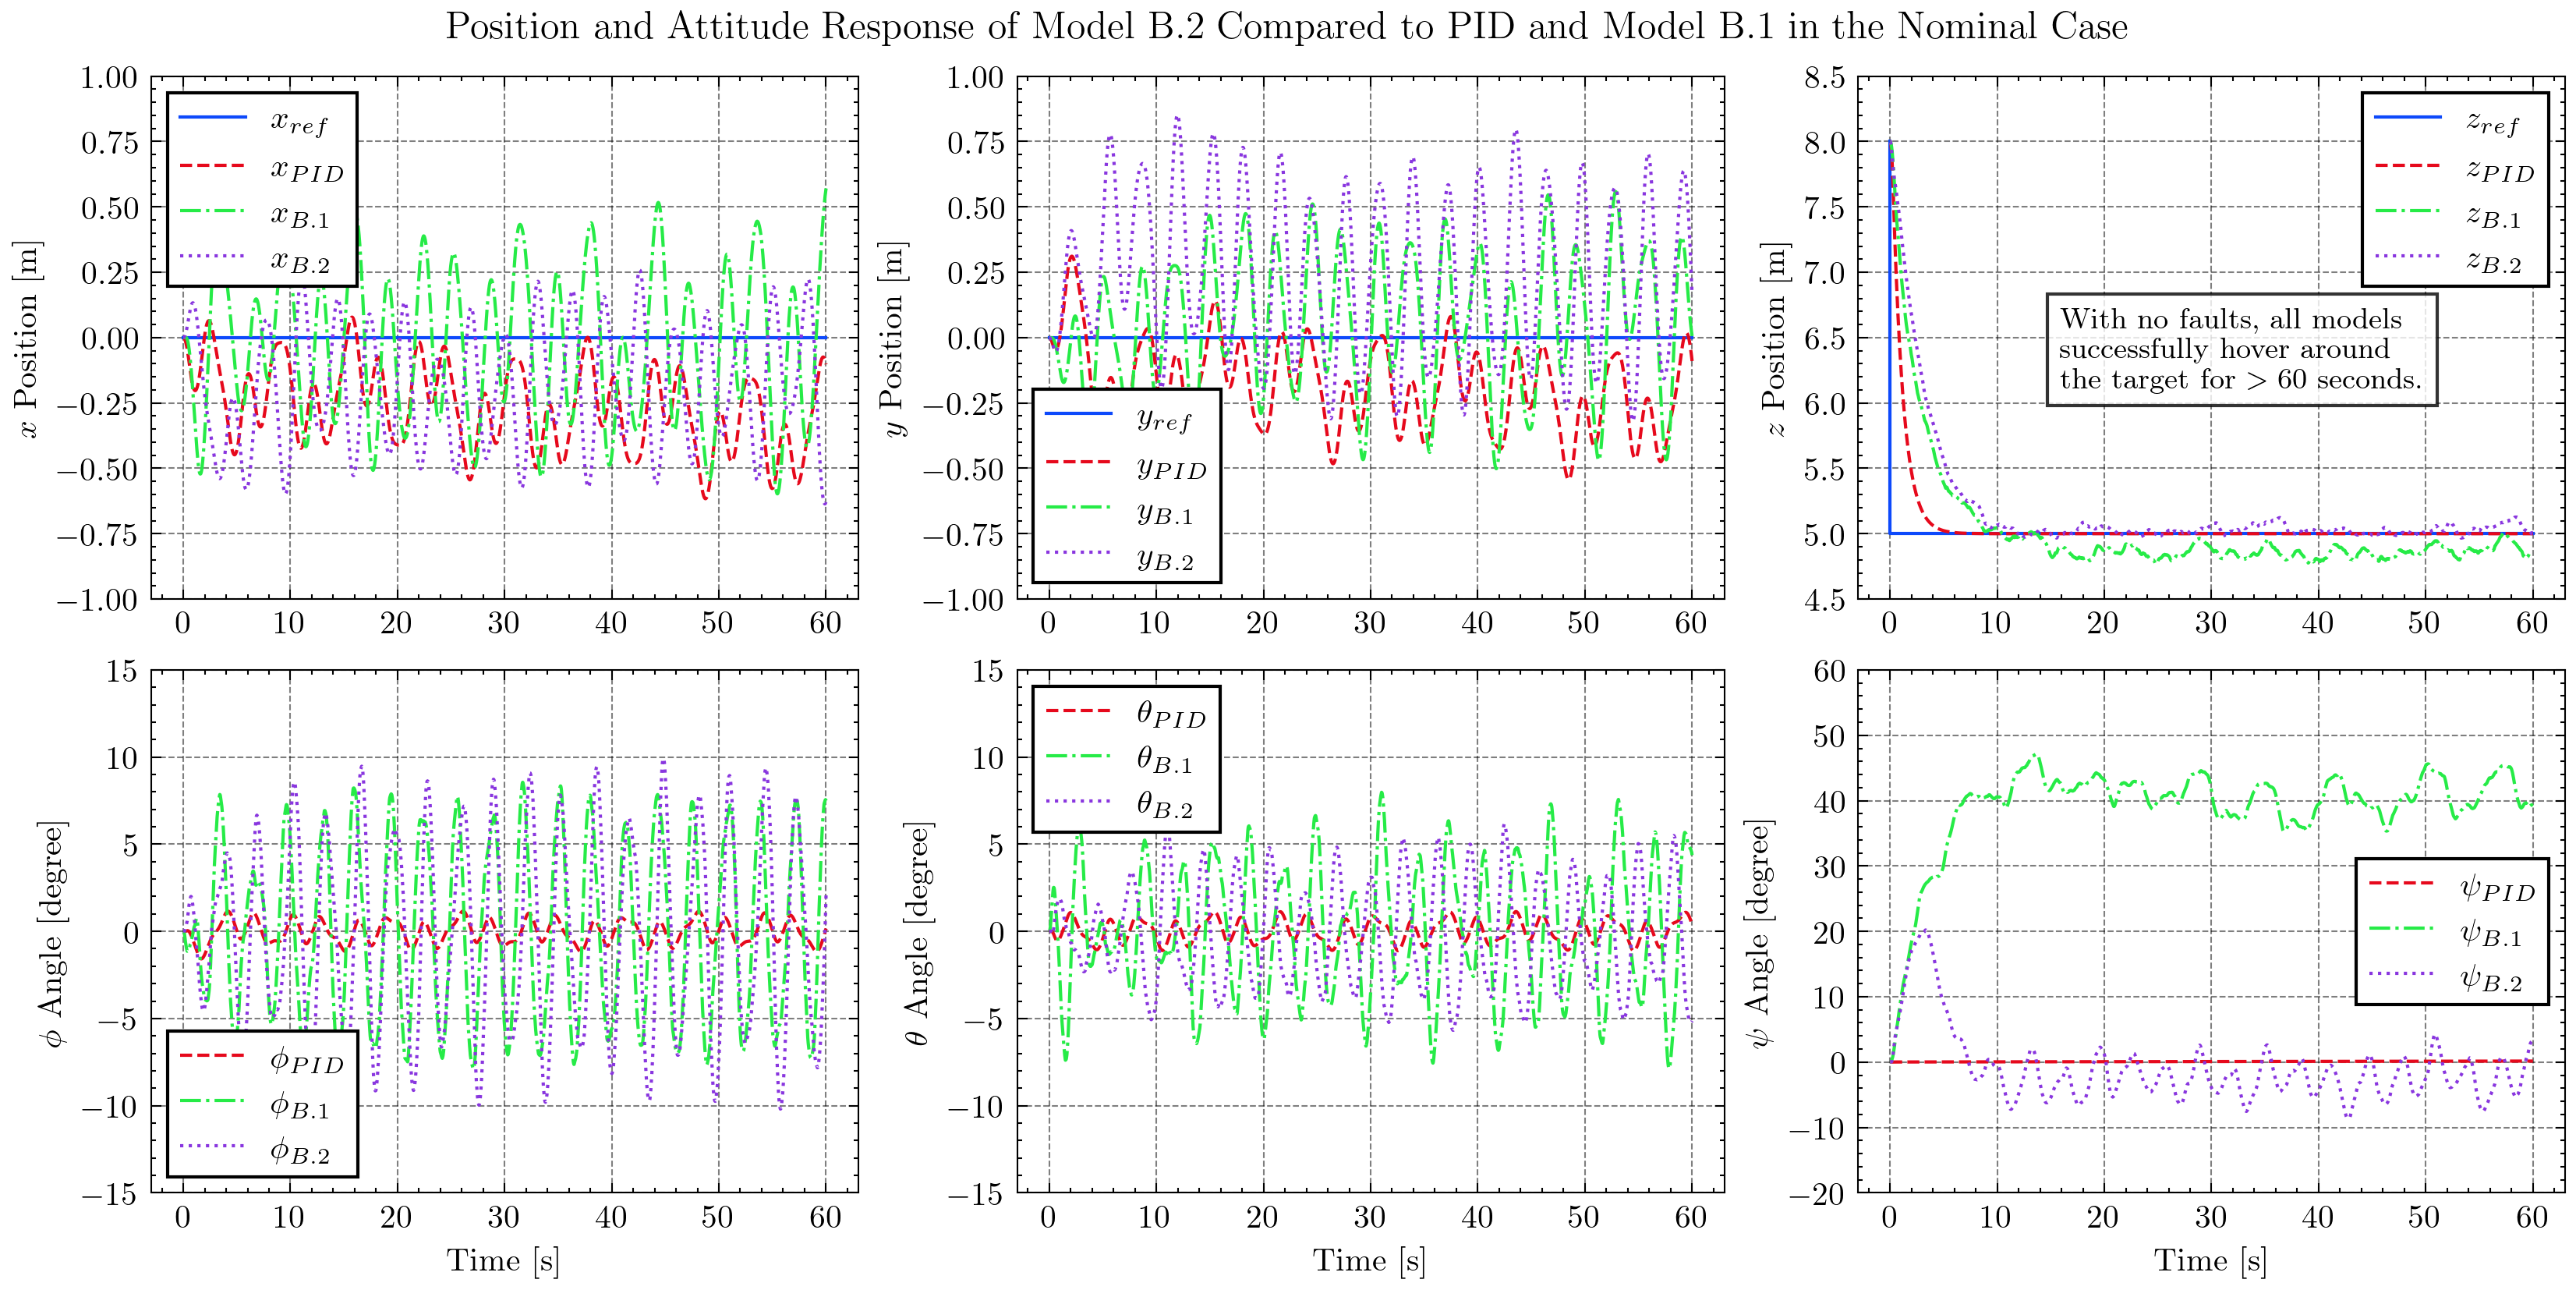

Closing Plots


In [4]:
print("Getting Data")

# B3_project_name = "RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case1.csv"

B3_C1_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case1.csv")

B1_C1_data = pd.read_csv("../experimentation/rewardModels/modelB/data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000.csv")

PID_C1_data = pd.read_csv("../experimentation/rewardModels/modelB/data/PID-ModelB_V1_1.csv")

# Data cleaning
print("Cleaning Data")

B3_C1_data = cleanData(B3_C1_data)
B1_C1_data = cleanData(B1_C1_data)
PID_C1_data = cleanData(PID_C1_data)


symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-1, 1],
    [-1, 1],
    [4.5, 8.5],
    [-15, 15],
    [-15, 15],
    [-20, 60],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(11, 5.5), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        ax[row, col].plot(PID_C1_data.iloc[:, 1], PID_C1_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{PID}$")
        B1_line = ax[row, col].plot(B1_C1_data.iloc[:, 1], B1_C1_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.1}$")
        B3_line = ax[row, col].plot(B3_C1_data.iloc[:, 1], B3_C1_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.2}$")

        # final_point = RL_data.iloc[-1, [1, i + 2]]
        # ax[row, col].plot(final_point[0], final_point[1], 'x', color=l1[0].get_color())

        # final_point = RL_data_modelA1.iloc[-1, [1, i + 2]]
        # ax[row, col].plot(final_point[0], final_point[1], 'x', color=l2[0].get_color())

        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 1 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

# Create the text box
text = "With no faults, all models\n" \
       "successfully hover around\n" \
       "the target for $>60$ seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
fig.text(0.8, 0.7, text, fontsize=9, bbox=bbox, transform=fig.transFigure)


plt.suptitle("Position and Attitude Response of Model B.2 Compared to PID and Model B.1 in the Nominal Case")

plt.savefig(f'images/nominalCaseComparisonPIDvsB1vsB2-v2.pdf', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


Getting Data
Cleaning Data
Plotting Data


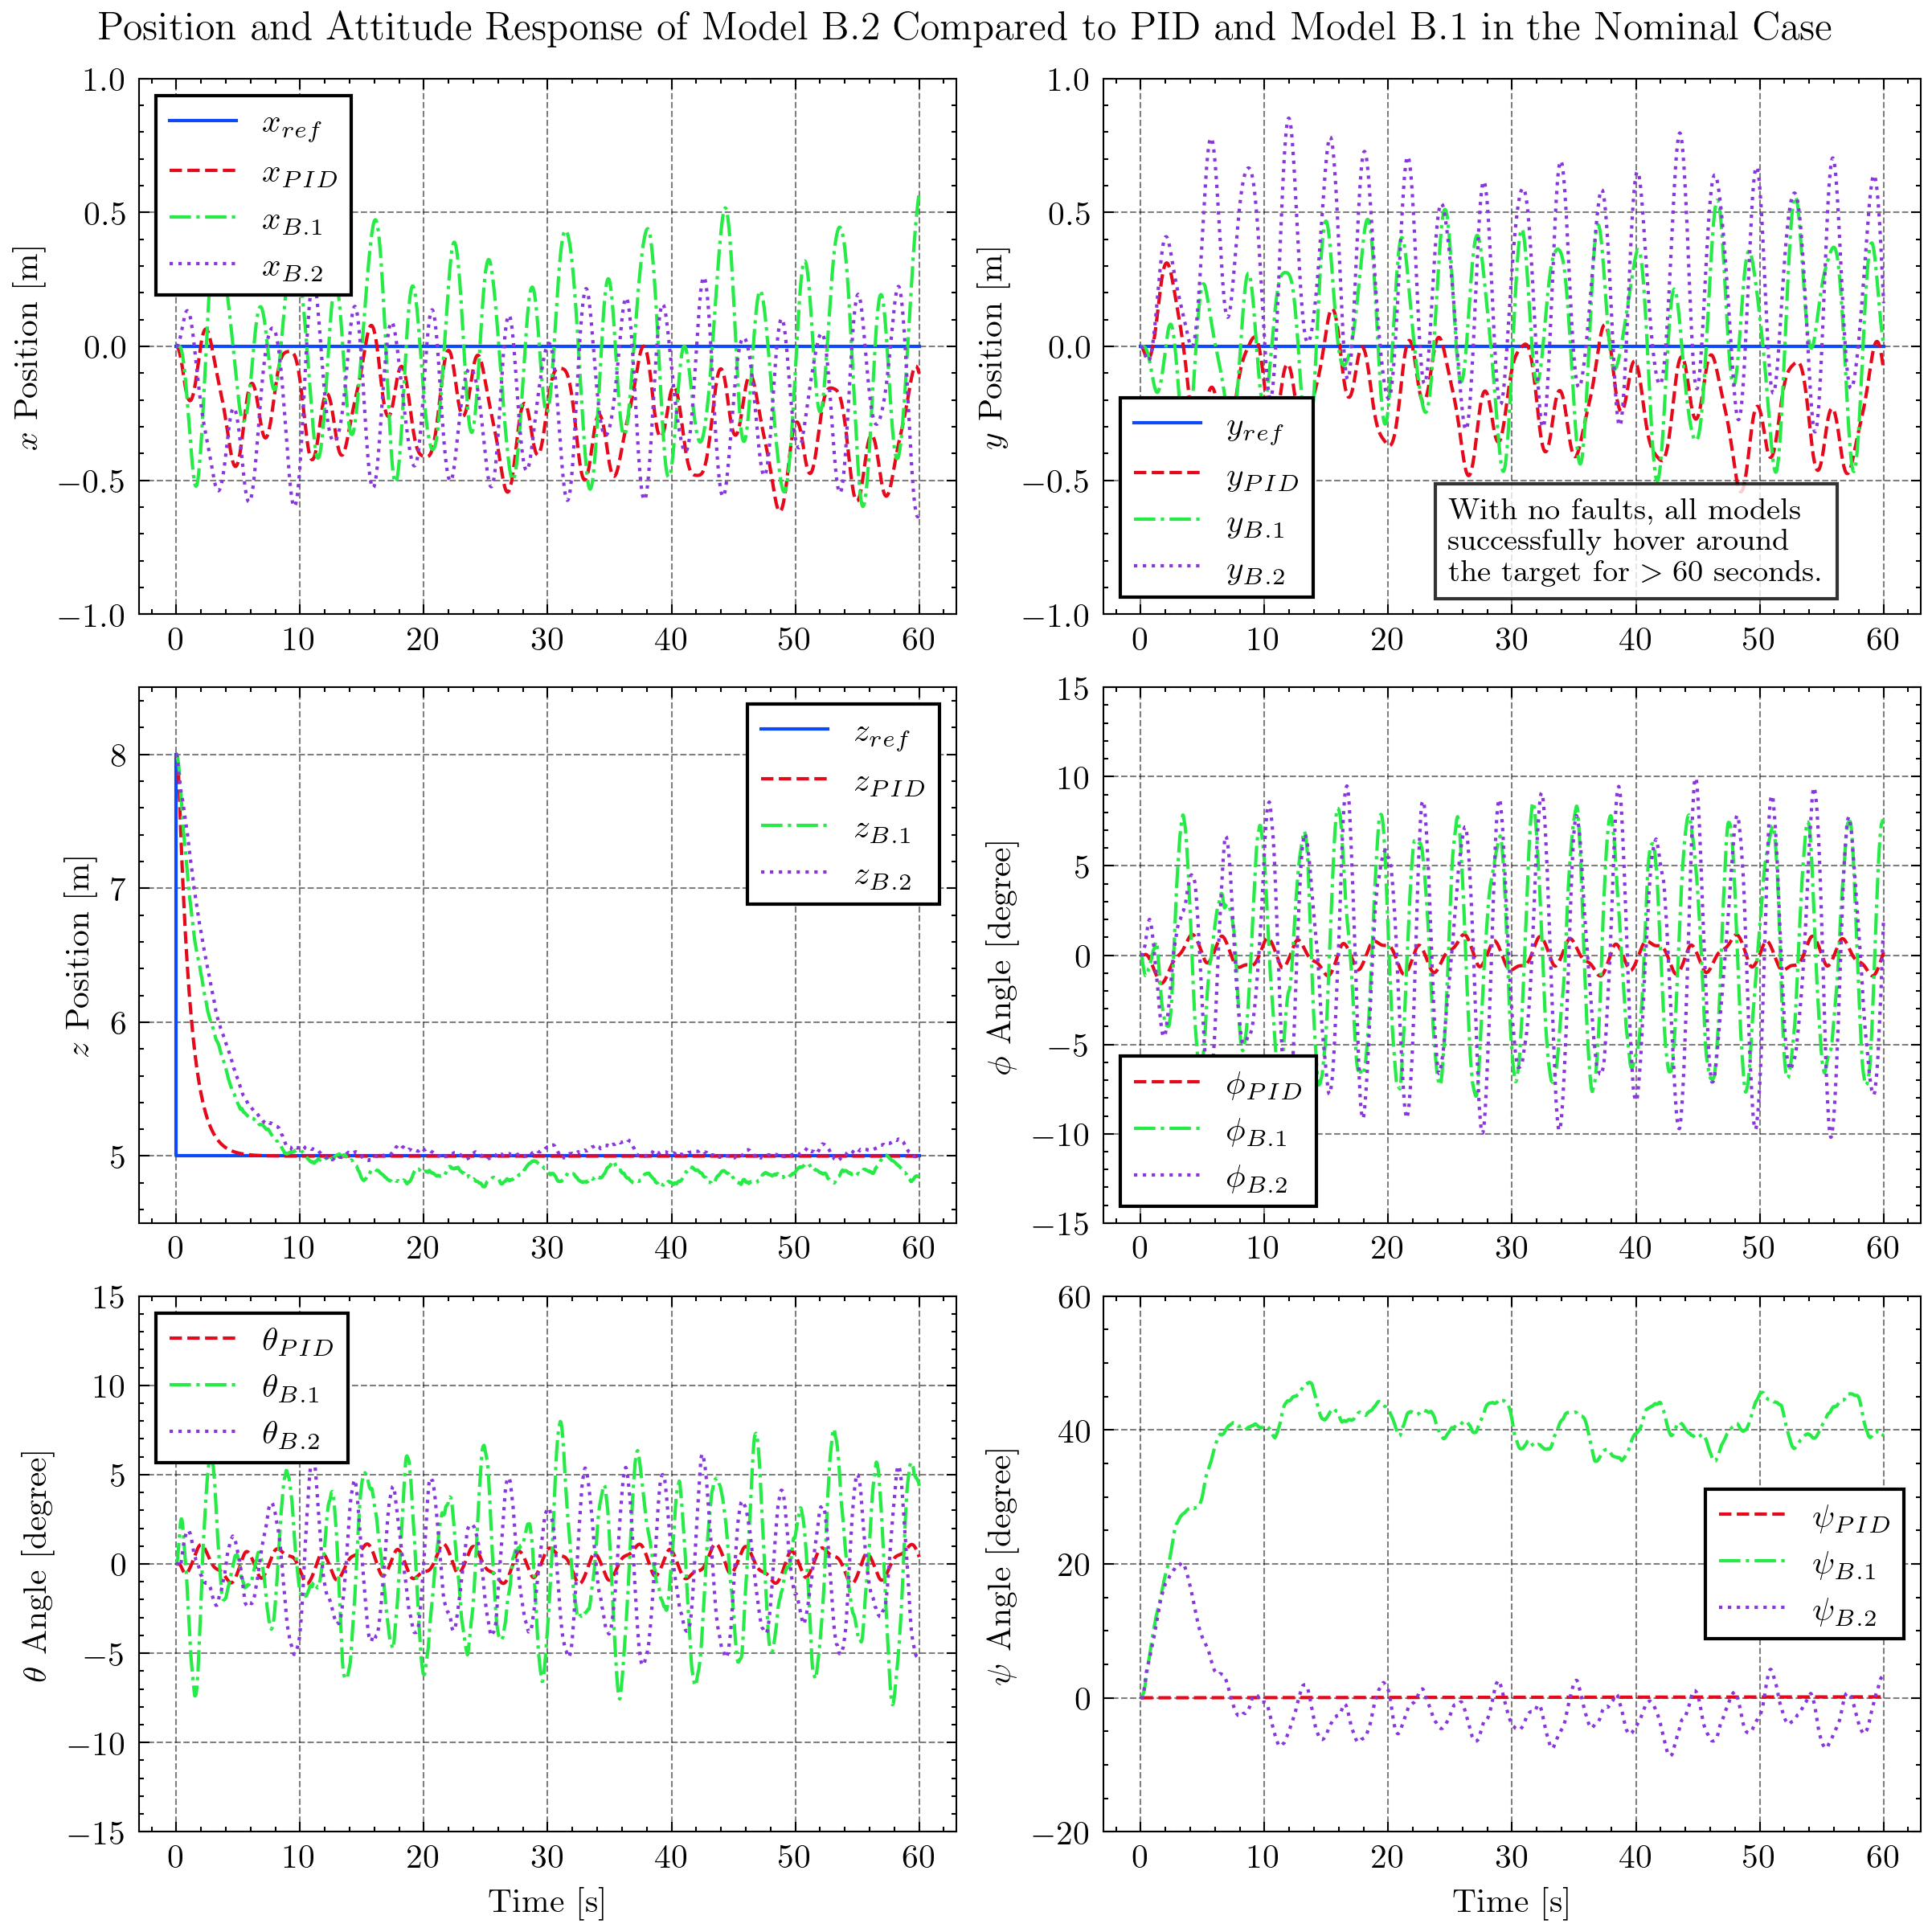

Closing Plots


In [6]:
print("Getting Data")

# B3_project_name = "RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case1.csv"

B3_C1_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case1.csv")

B1_C1_data = pd.read_csv("../experimentation/rewardModels/modelB/data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000.csv")

PID_C1_data = pd.read_csv("../experimentation/rewardModels/modelB/data/PID-ModelB_V1_1.csv")

# Data cleaning
print("Cleaning Data")

B3_C1_data = cleanData(B3_C1_data)
B1_C1_data = cleanData(B1_C1_data)
PID_C1_data = cleanData(PID_C1_data)


symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-1, 1],
    [-1, 1],
    [4.5, 8.5],
    [-15, 15],
    [-15, 15],
    [-20, 60],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 3
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(8, 8), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        ax[row, col].plot(PID_C1_data.iloc[:, 1], PID_C1_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{PID}$")
        B1_line = ax[row, col].plot(B1_C1_data.iloc[:, 1], B1_C1_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.1}$")
        B3_line = ax[row, col].plot(B3_C1_data.iloc[:, 1], B3_C1_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.2}$")

        # final_point = RL_data.iloc[-1, [1, i + 2]]
        # ax[row, col].plot(final_point[0], final_point[1], 'x', color=l1[0].get_color())

        # final_point = RL_data_modelA1.iloc[-1, [1, i + 2]]
        # ax[row, col].plot(final_point[0], final_point[1], 'x', color=l2[0].get_color())

        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 2 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

# Create the text box
text = "With no faults, all models\n" \
       "successfully hover around\n" \
       "the target for $>60$ seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
fig.text(0.75, 0.7, text, fontsize=9, bbox=bbox, transform=fig.transFigure)


plt.suptitle("Position and Attitude Response of Model B.2 Compared to PID and Model B.1 in the Nominal Case")

plt.savefig(f'images/nominalCaseComparisonPIDvsB1vsB2-v3.pdf', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


In [7]:
print(f'SSE for x: {B3_C1_data["x"].mean():.5f}')
post_process(B3_C1_data, z_settling_time=7.35)

SSE for x: -0.18795
RMSE for x: 0.29404
RMSE for y: 0.39317
SSE for z: 0.03370
RMSE for z: 0.05626
RMSE for phi: 5.48942
RMSE for theta: 2.98697


Plotting Data


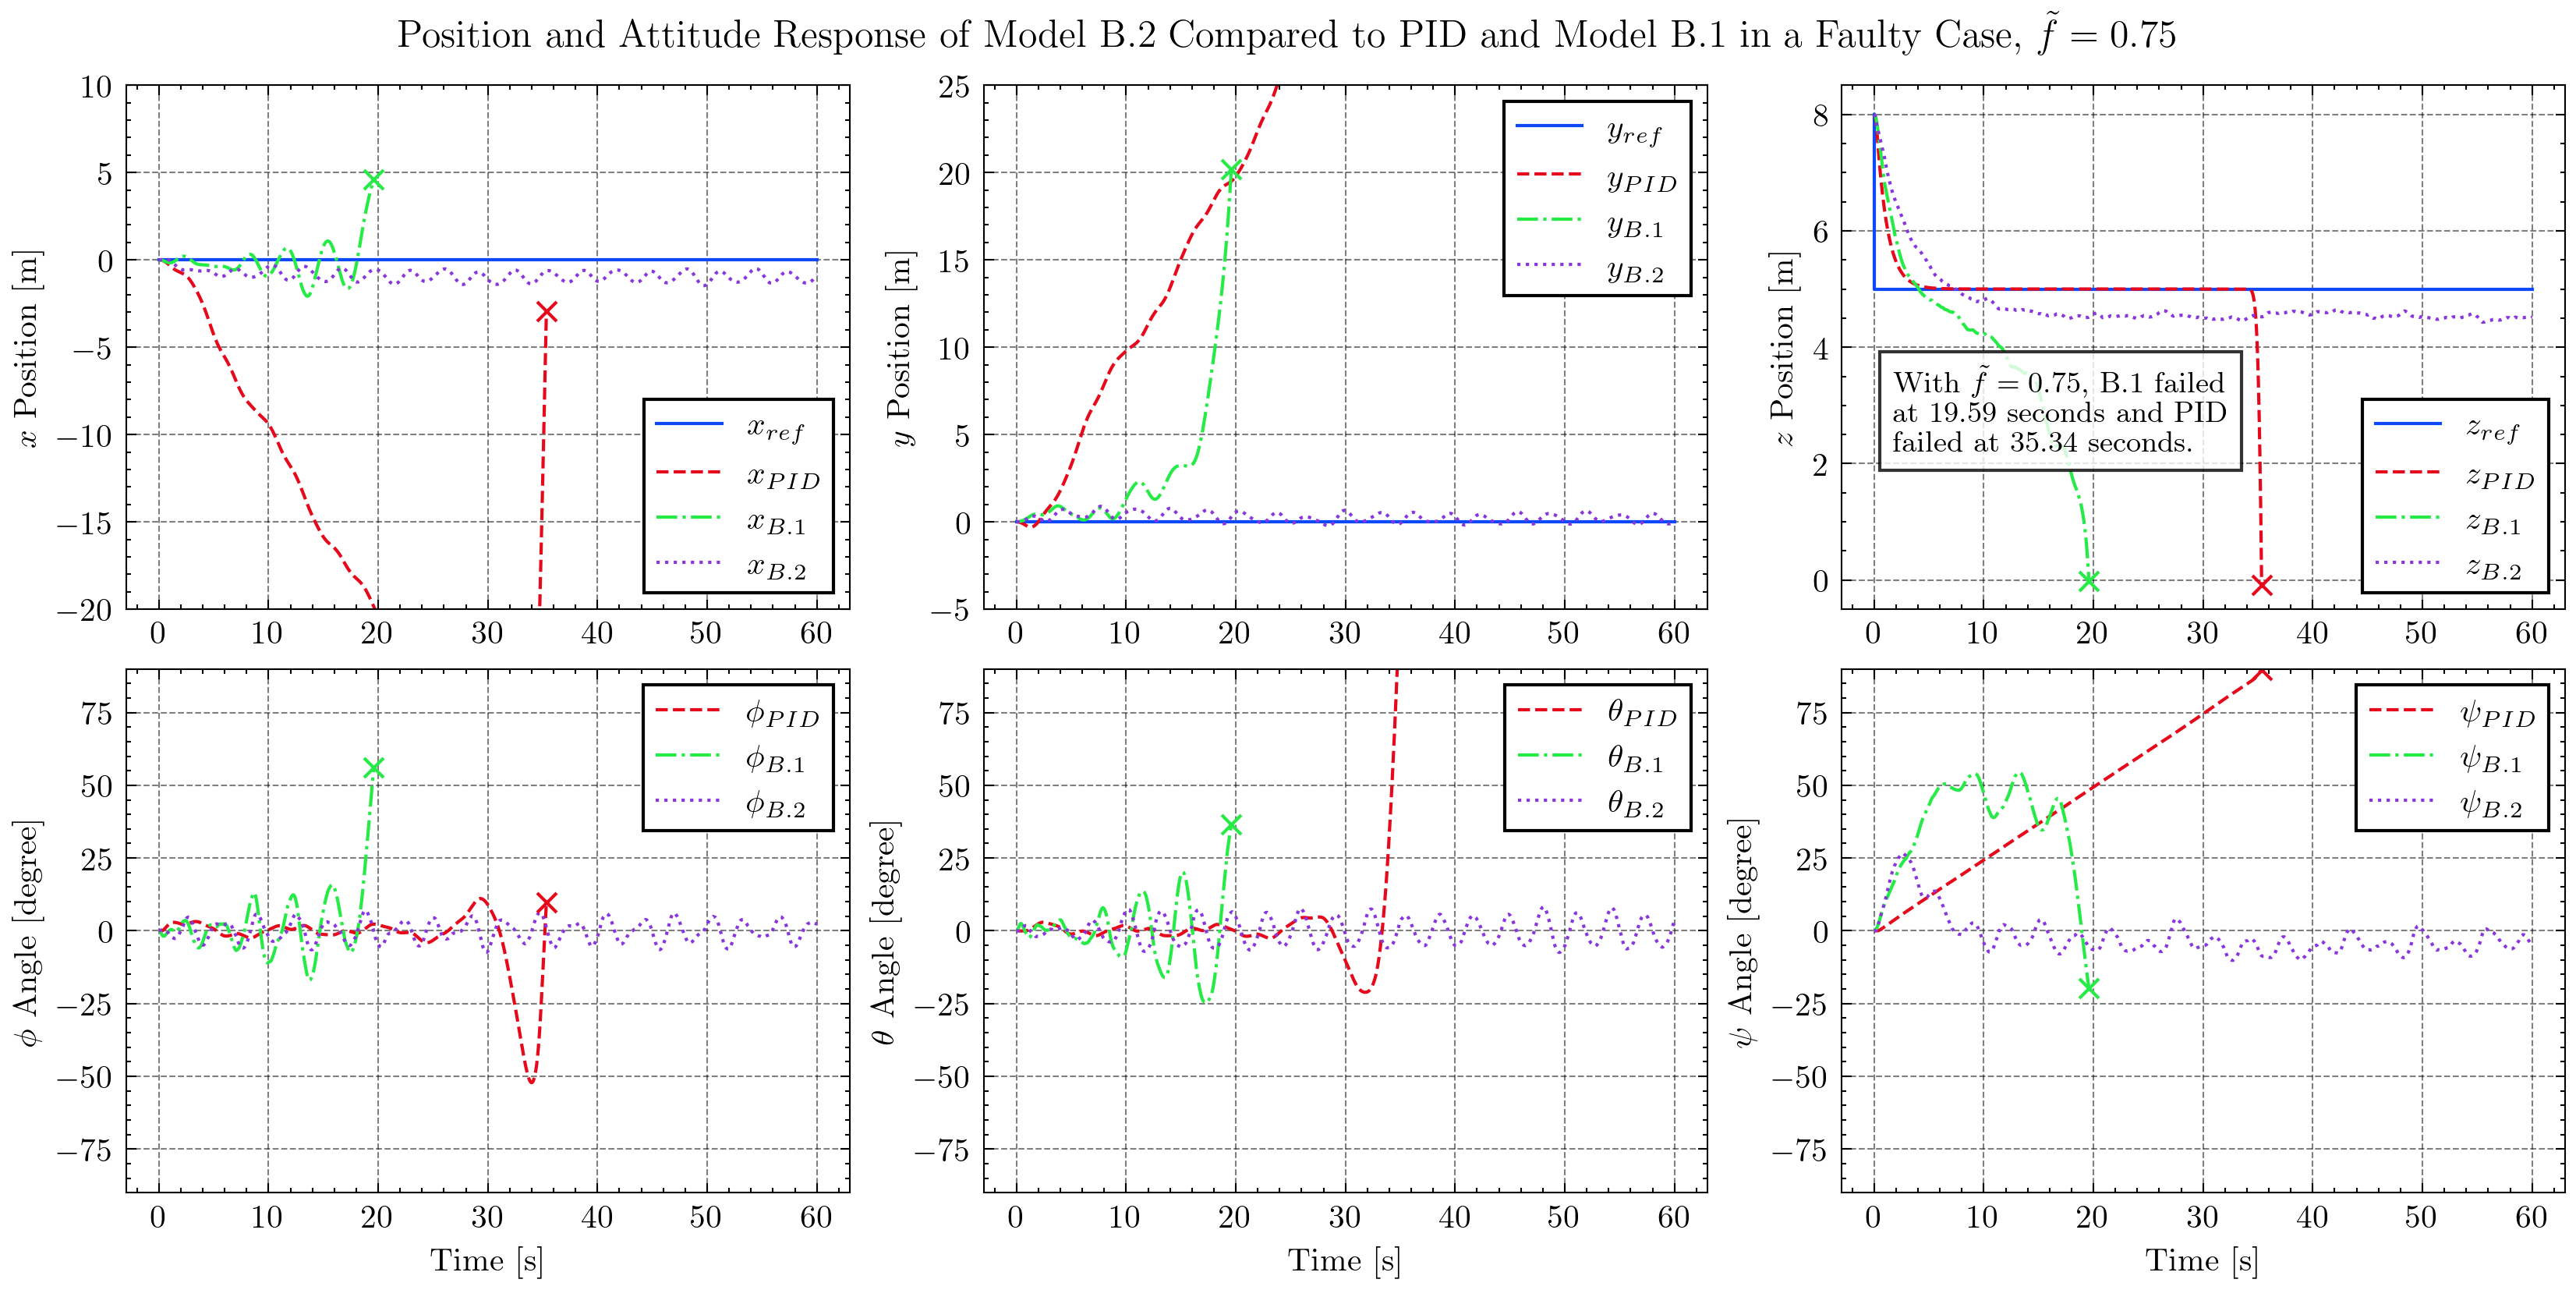

Closing Plots


In [7]:

B3_C5_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5.csv")
B1_C5_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_63.csv")
PID_C5_data = pd.read_csv("data/PID-ModelB_V3_1-Case5.csv")

B3_C5_data = cleanData(B3_C5_data)
B1_C5_data = cleanData(B1_C5_data)
PID_C5_data = cleanData(PID_C5_data)


symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-20, 10],
    [-5, 25],
    [-0.5, 8.5],
    [-90, 90],
    [-90, 90],
    [-90, 90],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(11, 5.5), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        PID_line = ax[row, col].plot(PID_C5_data.iloc[:, 1], PID_C5_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{PID}$")
        B1_line = ax[row, col].plot(B1_C5_data.iloc[:, 1], B1_C5_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.1}$")
        B3_line = ax[row, col].plot(B3_C5_data.iloc[:, 1], B3_C5_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.2}$")

        final_point = B1_C5_data.iloc[-1, [1, i + 2]]
        ax[row, col].plot(final_point[0], final_point[1], 'x', color=B1_line[0].get_color())

        final_point = PID_C5_data.iloc[-1, [1, i + 2]]
        ax[row, col].plot(final_point[0], final_point[1], 'x', color=PID_line[0].get_color())

        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 1 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

text = "With $\\tilde{f}=0.75$, B.1 failed\n" \
       "at 19.59 seconds and PID\n" \
       "failed at 35.34 seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
fig.text(0.735, 0.65, text, fontsize=9, bbox=bbox, transform=fig.transFigure)

plt.suptitle("Position and Attitude Response of Model B.2 Compared to PID and Model B.1 in a Faulty Case, $\\tilde{f}=0.75$")

plt.savefig(f'images/faultyCase_0_75-ComparisonPIDvsB1vsB2-v2.pdf', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


Plotting Data


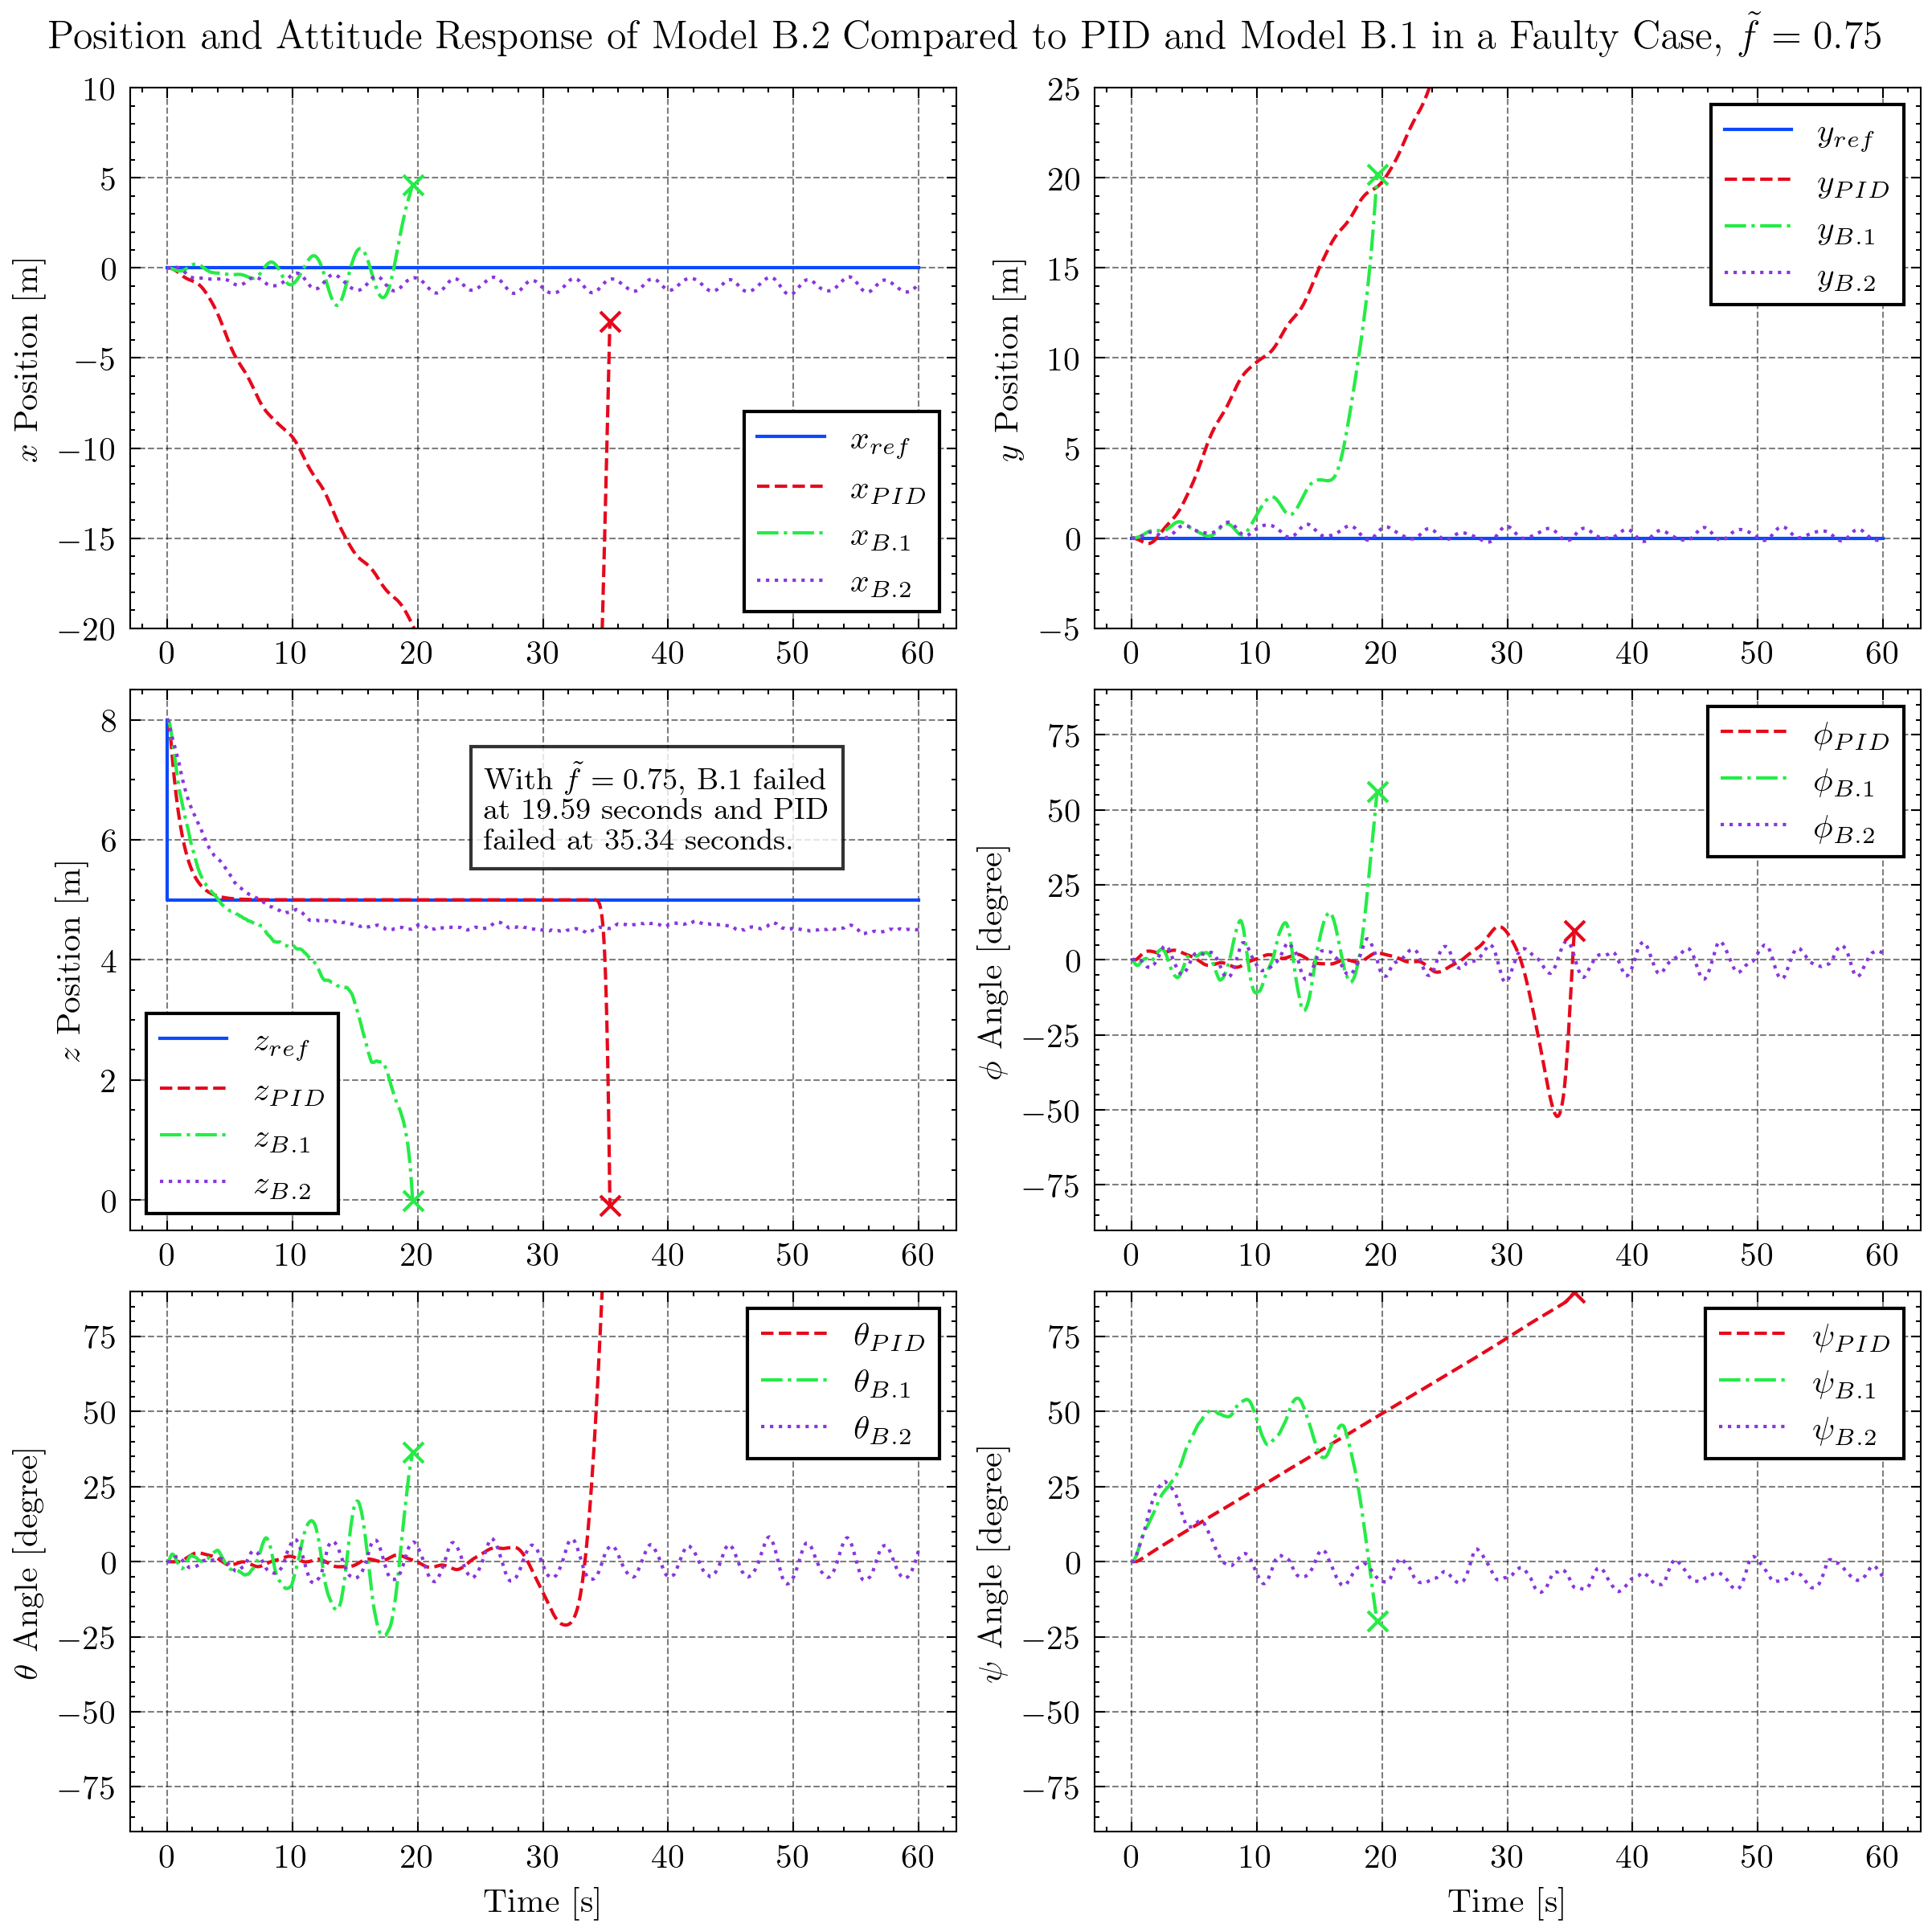

Closing Plots


In [6]:

B3_C5_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5.csv")
B1_C5_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_63.csv")
PID_C5_data = pd.read_csv("data/PID-ModelB_V3_1-Case5.csv")

B3_C5_data = cleanData(B3_C5_data)
B1_C5_data = cleanData(B1_C5_data)
PID_C5_data = cleanData(PID_C5_data)


symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-20, 10],
    [-5, 25],
    [-0.5, 8.5],
    [-90, 90],
    [-90, 90],
    [-90, 90],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 3
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(8, 8), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        PID_line = ax[row, col].plot(PID_C5_data.iloc[:, 1], PID_C5_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{PID}$")
        B1_line = ax[row, col].plot(B1_C5_data.iloc[:, 1], B1_C5_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.1}$")
        B3_line = ax[row, col].plot(B3_C5_data.iloc[:, 1], B3_C5_data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{B.2}$")

        final_point = B1_C5_data.iloc[-1, [1, i + 2]]
        ax[row, col].plot(final_point[0], final_point[1], 'x', color=B1_line[0].get_color())

        final_point = PID_C5_data.iloc[-1, [1, i + 2]]
        ax[row, col].plot(final_point[0], final_point[1], 'x', color=PID_line[0].get_color())

        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 2 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

text = "With $\\tilde{f}=0.75$, B.1 failed\n" \
       "at 19.59 seconds and PID\n" \
       "failed at 35.34 seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
fig.text(0.25, 0.56, text, fontsize=9, bbox=bbox, transform=fig.transFigure)

plt.suptitle("Position and Attitude Response of Model B.2 Compared to PID and Model B.1 in a Faulty Case, $\\tilde{f}=0.75$")

plt.savefig(f'images/faultyCase_0_75-ComparisonPIDvsB1vsB2-v3.pdf', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


In [10]:
print(f'SSE for x: {B3_C5_data["x"].mean():.5f}')
post_process(B3_C5_data, z_settling_time=11.05)

SSE for x: -0.88154
RMSE for x: 0.93487
RMSE for y: 0.35912
SSE for z: -0.45349
RMSE for z: 0.45631
RMSE for phi: 3.31245
RMSE for theta: 4.13166



\begin{table}[H]
\normalsize
    \centering
    \begin{tabular}{c c c c | c}
        \hline
        \rowcolor{light-gray}
        Parameter & Characteristic & Units & Symbol & Model B.2 \\
        \hline
        \multirow{2}{*}{} $x$ Response & RMSE & \SI{}{\metre} & $x_{RMSE}$ & $0.93487$  \\
        & SSE & \SI{}{\metre} & $x_{SSE}$ & $-0.88154$  \\
        \hline
        \multirow{1}{*}{} $y$ Response & RMSE & \SI{}{\metre} & $y_{RMSE}$ & $0.35912$  \\
        \hline
        \multirow{3}{*}{} $z$ Response & RMSE & \SI{}{\metre} & $z_{RMSE}$ & $0.45631$  \\
        & Settling Time (5\%) & \SI{}{\second} & $T_s$ & $11.05$  \\
        & SSE & \SI{}{\metre} & $z_{SSE}$ & $-0.45349$  \\
        \hline
        \multirow{1}{*}{} $\phi$ Response & RMSE & \SI{}{\radian} & $\phi_{RMSE}$ & $3.31245$  \\
        \hline
        \multirow{1}{*}{} $\theta$ Response & RMSE & \SI{}{\radian} & $\theta_{RMSE}$ & $4.13166$  \\
        \hline
    \end{tabular}
\caption{Table detailing the response characteristics of Model B.2 in the faulty case.}
\label{table:caseStudy:modelB.2:results:responseCharacteristicsFaulty}
\end{table}



Plotting Data


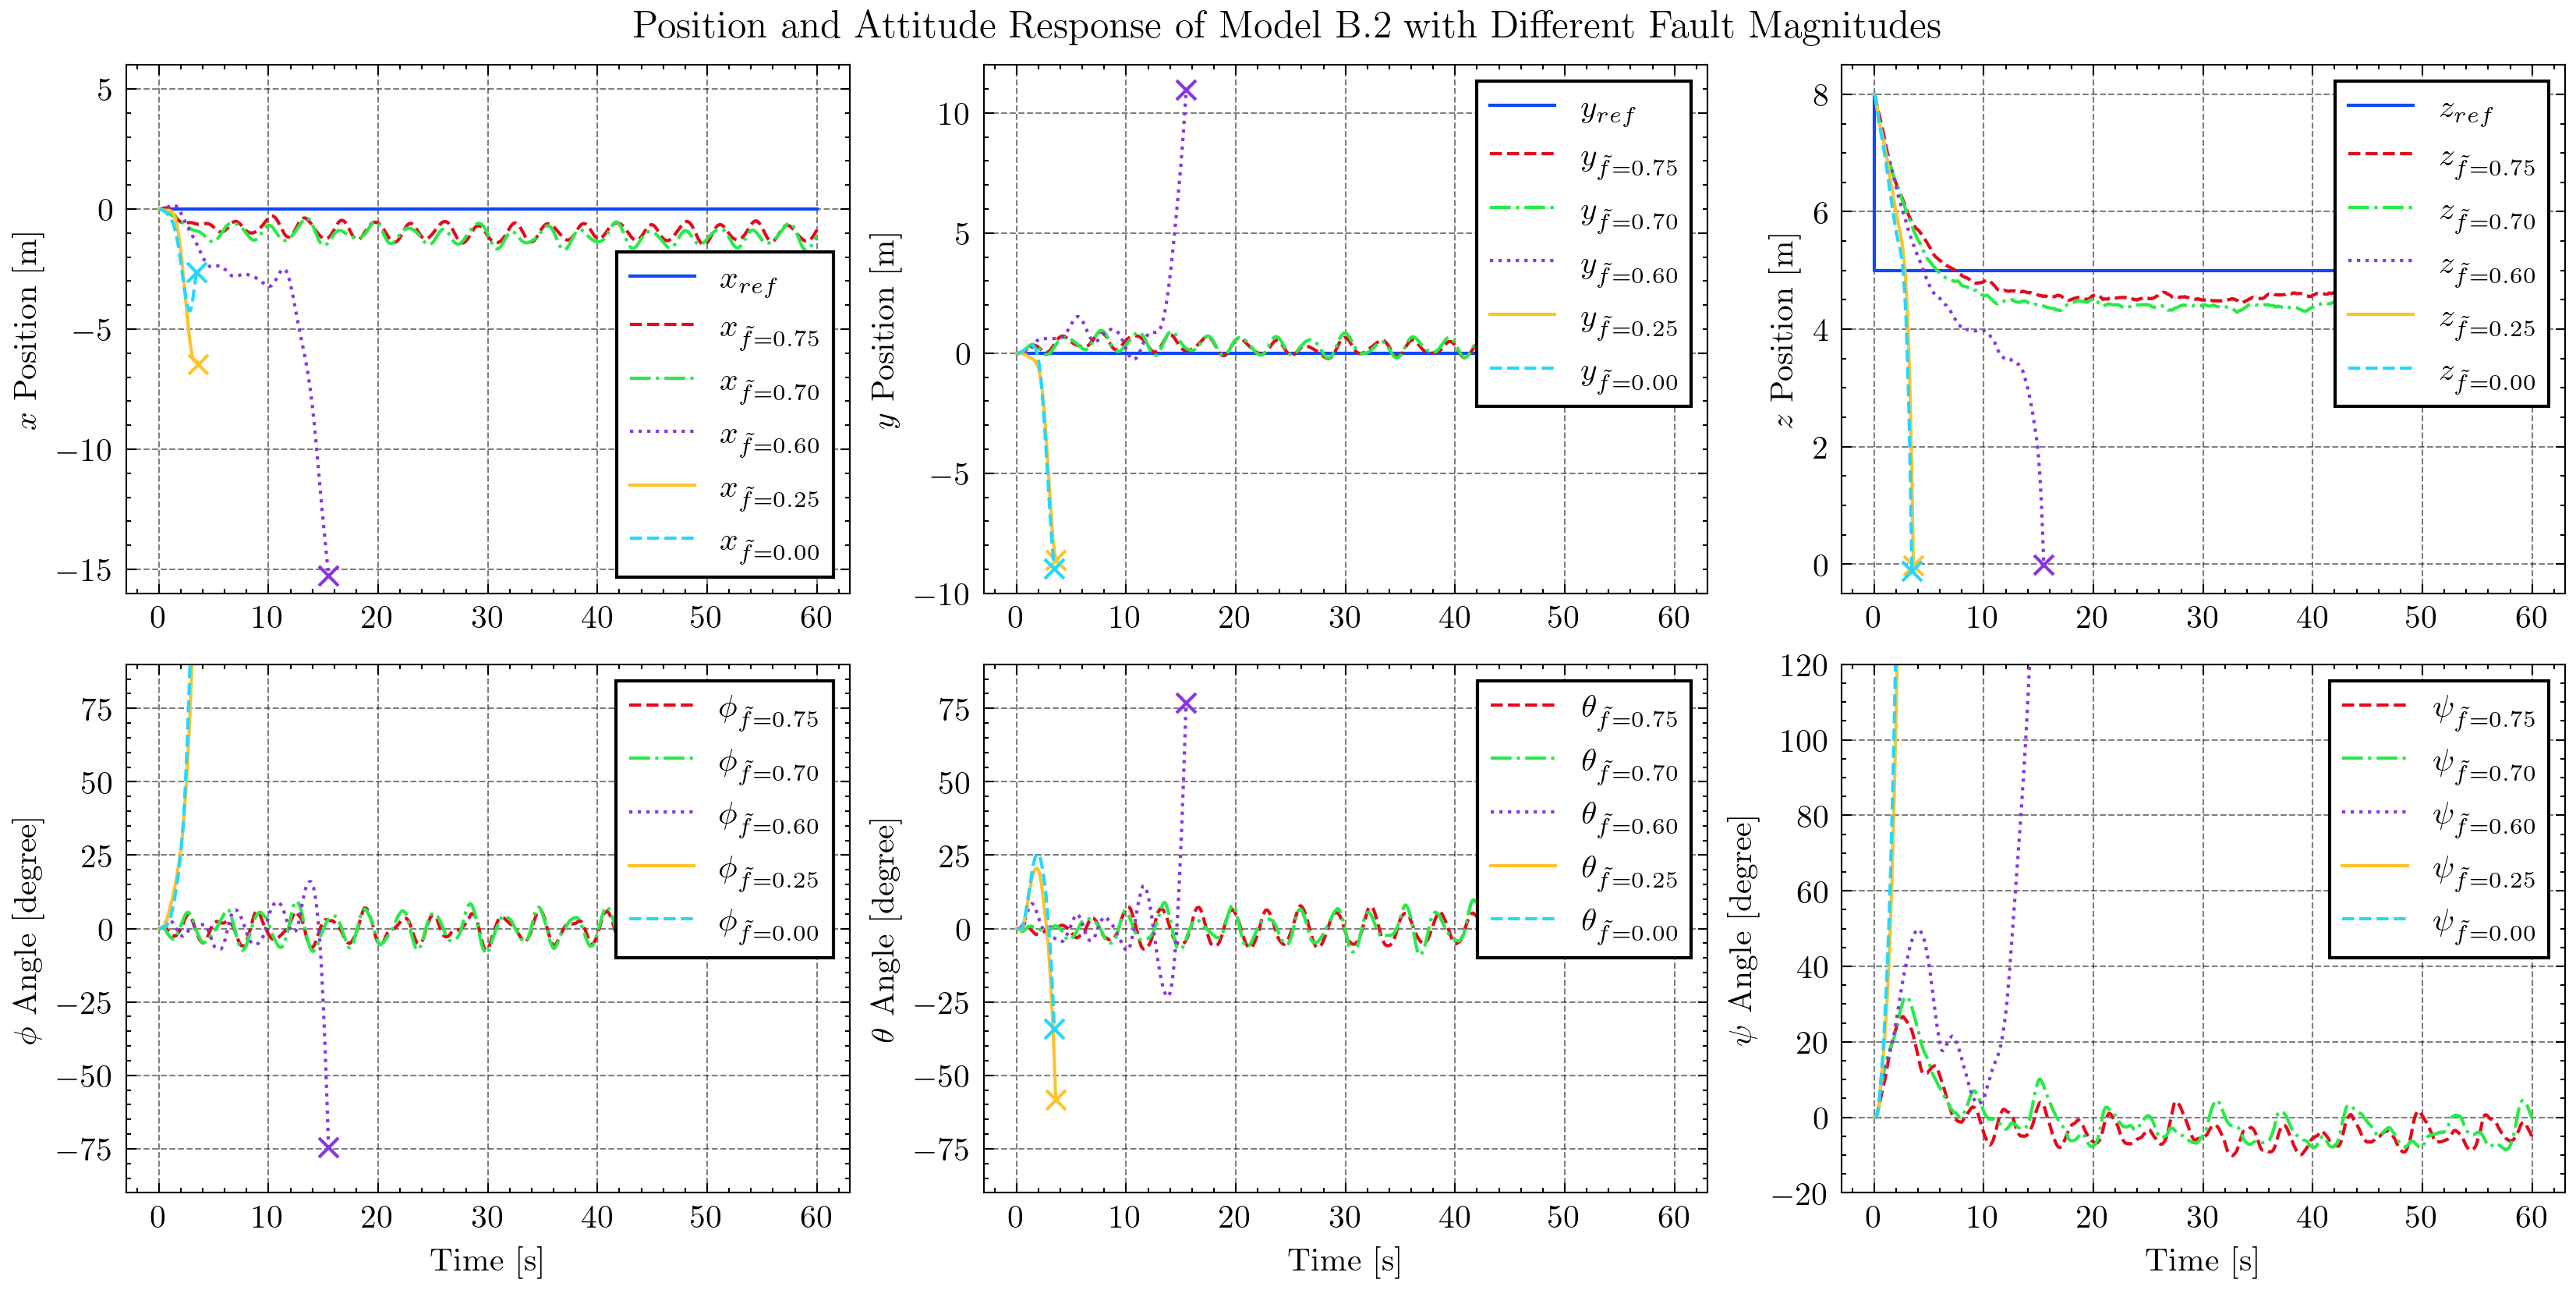

Closing Plots


In [8]:
B3_0_75_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5.csv")
B3_0_70_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5-ftilde_0_70.csv")
B3_0_60_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5-ftilde_0_60.csv")
B3_0_25_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5-ftilde_0_25.csv")
B3_0_00_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5-ftilde_0_00.csv")

B3_0_75_data = cleanData(B3_0_75_data)
B3_0_70_data = cleanData(B3_0_70_data)
B3_0_60_data = cleanData(B3_0_60_data)
B3_0_25_data = cleanData(B3_0_25_data)
B3_0_00_data = cleanData(B3_0_00_data)


datas = [
    B3_0_75_data,
    B3_0_70_data,
    B3_0_60_data,
    B3_0_25_data,
    B3_0_00_data,
]
ftildes = ["0.75", "0.70", "0.60", "0.25", "0.00"]

symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-16, 6],
    [-10, 12],
    [-0.5, 8.5],
    [-90, 90],
    [-90, 90],
    [-20, 120],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(11, 5.5), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        for data_i, data in enumerate(datas):
            line = ax[row, col].plot(data.iloc[:, 1], data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{\\tilde{f}="+ ftildes[data_i] +"}$")

            if data_i >= 2:
                final_point = data.iloc[-1, [1, i + 2]]
                ax[row, col].plot(final_point[0], final_point[1], 'x', color=line[0].get_color())



        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 1 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

text = "All models with $\\tilde{f} \le 0.50$," \
       "\n fail within 5 seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
# fig.text(0.76, 0.66, text, fontsize=9, bbox=bbox, transform=fig.transFigure)



plt.suptitle("Position and Attitude Response of Model B.2 with Different Fault Magnitudes")

plt.savefig(f'images/differentFaultMagnitudeComparisonB2-v2.pdf', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


Plotting Data


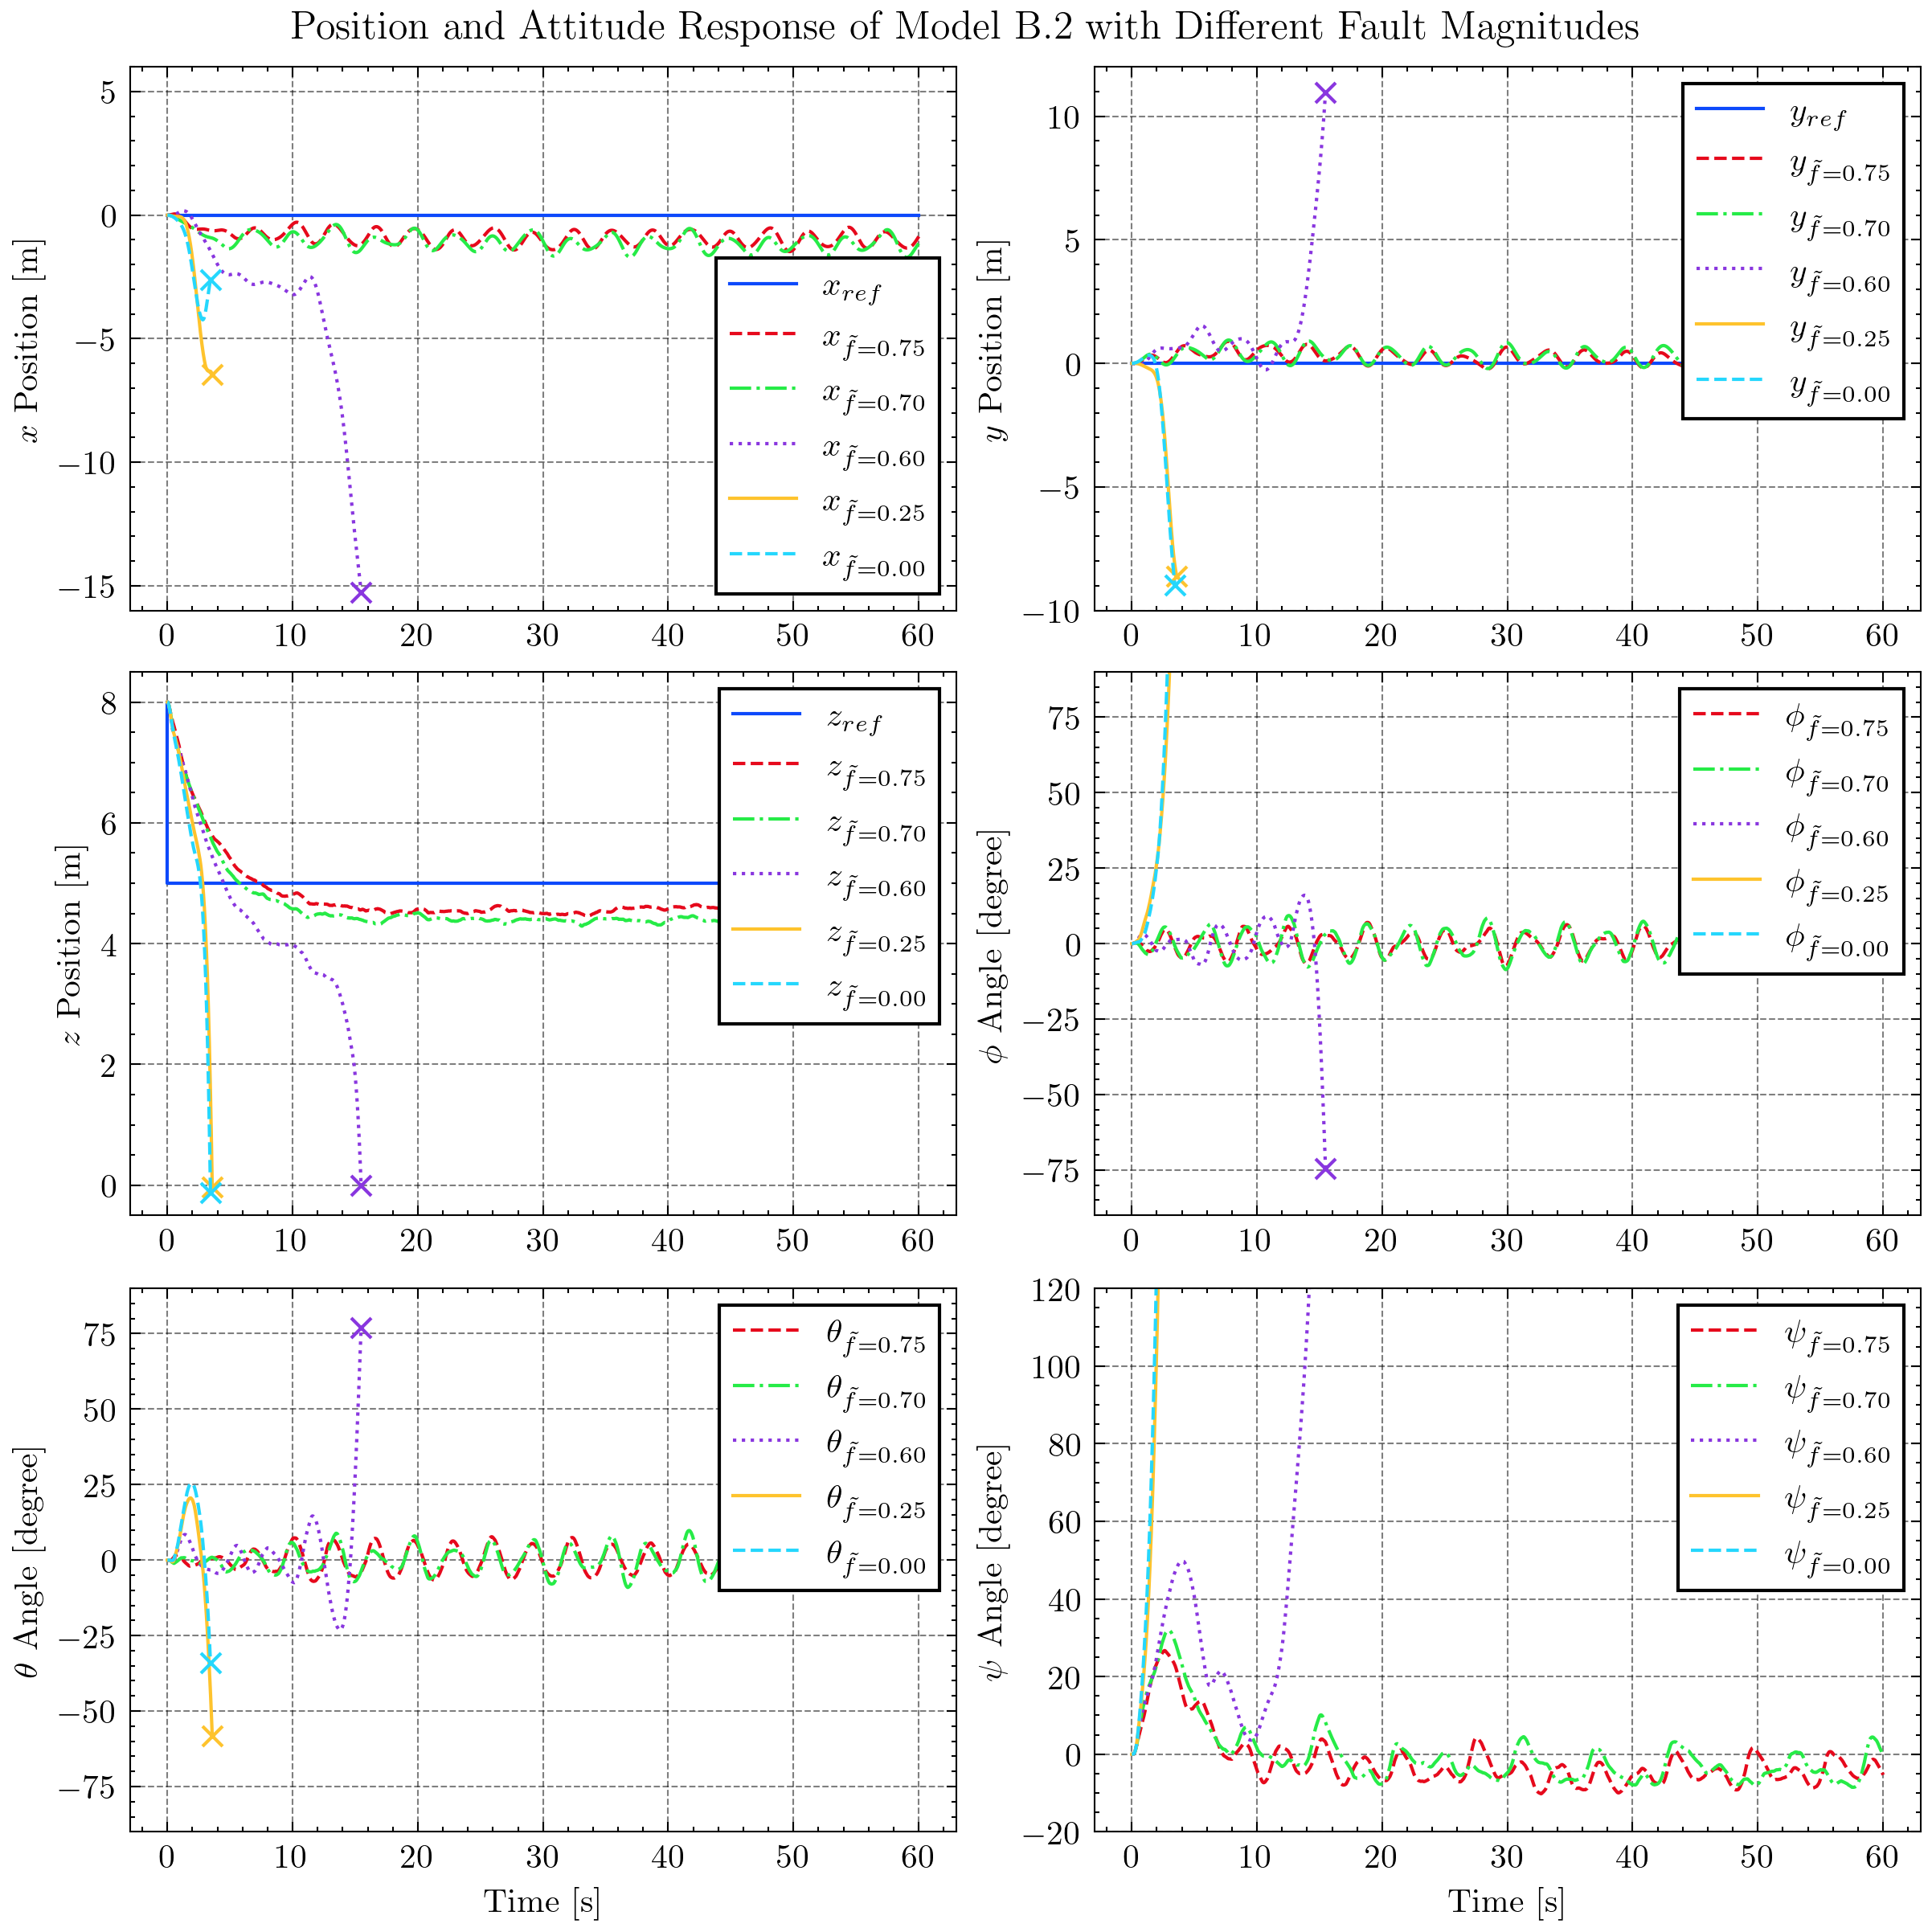

Closing Plots


In [2]:
B3_0_75_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5.csv")
B3_0_70_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5-ftilde_0_70.csv")
B3_0_60_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5-ftilde_0_60.csv")
B3_0_25_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5-ftilde_0_25.csv")
B3_0_00_data = pd.read_csv("data/RL-ModelB_V3_1,fmi_0_75,run_1-3000000-Case5-ftilde_0_00.csv")

B3_0_75_data = cleanData(B3_0_75_data)
B3_0_70_data = cleanData(B3_0_70_data)
B3_0_60_data = cleanData(B3_0_60_data)
B3_0_25_data = cleanData(B3_0_25_data)
B3_0_00_data = cleanData(B3_0_00_data)


datas = [
    B3_0_75_data,
    B3_0_70_data,
    B3_0_60_data,
    B3_0_25_data,
    B3_0_00_data,
]
ftildes = ["0.75", "0.70", "0.60", "0.25", "0.00"]

symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-16, 6],
    [-10, 12],
    [-0.5, 8.5],
    [-90, 90],
    [-90, 90],
    [-20, 120],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 3
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(8, 8), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        for data_i, data in enumerate(datas):
            line = ax[row, col].plot(data.iloc[:, 1], data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{\\tilde{f}="+ ftildes[data_i] +"}$")

            if data_i >= 2:
                final_point = data.iloc[-1, [1, i + 2]]
                ax[row, col].plot(final_point[0], final_point[1], 'x', color=line[0].get_color())



        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 2 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

text = "All models with $\\tilde{f} \le 0.50$," \
       "\n fail within 5 seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
# fig.text(0.76, 0.66, text, fontsize=9, bbox=bbox, transform=fig.transFigure)



plt.suptitle("Position and Attitude Response of Model B.2 with Different Fault Magnitudes")

plt.savefig(f'images/differentFaultMagnitudeComparisonB2-v3.pdf', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


In [12]:
# PID_C5_data.query("real_time > 34")[["real_time", "z"]]
# 34.43 ish when PID_C5 starts to lose altitude

B3_0_60_data.describe()

time_step    real_time            x            y            z  \
count  1548.000000  1548.000000  1548.000000  1548.000000  1548.000000   
mean    773.500000     7.735000    -3.355257     1.266464     4.477247   
std     447.013423     4.470134     3.231555     1.961406     1.461593   
min       0.000000     0.000000   -15.253227    -0.265649    -0.008454   
25%     386.750000     3.867500    -3.183761     0.493585     3.536951   
50%     773.500000     7.735000    -2.717817     0.701508     4.068842   
75%    1160.250000    11.602500    -1.868207     1.047058     5.296112   
max    1547.000000    15.470000     0.174787    10.958082     8.000000   

               phi        theta          psi       reward  total_reward  
count  1548.000000  1548.000000  1548.000000  1548.000000   1548.000000  
mean     -0.168511     0.755892    41.478319     0.444088    401.475896  
std      10.811034    12.443437    47.908863     0.176288    217.181680  
min     -74.458415   -23.205200    -0.003068     0.000000      0.000000  
25%      -2.485092    -3.846121    13.786993     0.361194    197.375767  
50%       0.938534    -0.281559    22.210743     0.437074    446.536710  
75%       4.503587     4.023904    47.566309     0.544697    602.190804  
max      16.016184    77.043578   245.118604     0.824808    687.948460

In [47]:
B1_C1_data.query("real_time > 10").describe()

time_step    real_time            x            y            z  \
count  5001.000000  5001.000000  5001.000000  5001.000000  5001.000000   
mean   3501.000000    35.010000    -0.041978     0.072514     4.871170   
std    1443.808678    14.438087     0.285259     0.265927     0.056794   
min    1001.000000    10.010000    -0.597522    -0.501400     4.770759   
25%    2251.000000    22.510000    -0.288303    -0.120723     4.825086   
50%    3501.000000    35.010000    -0.049836     0.094305     4.864220   
75%    4751.000000    47.510000     0.195686     0.297553     4.901965   
max    6001.000000    60.010000     0.570760     0.558504     5.043912   

               phi        theta          psi       reward  total_reward  
count  5001.000000  5001.000000  5001.000000  5001.000000   5001.000000  
mean      0.005566    -0.011043    41.083978     0.970899   3242.583419  
std       5.144397     3.770347     2.670772     0.011986   1399.917042  
min      -7.897306    -7.878588    35.313835     0.940577    811.993935  
25%      -5.142384    -2.916594    39.199515     0.962762   2031.893686  
50%      -0.173712    -0.155199    41.142286     0.972154   3244.011258  
75%       5.078544     3.109385    43.083292     0.979421   4452.588265  
max       8.552322     7.980020    47.113901     0.997783   5666.474340

In [53]:
B3_C1_data.query("real_time > 12").describe()

time_step    real_time            x            y            z  \
count  4801.000000  4801.000000  4801.000000  4801.000000  4801.000000   
mean   3601.000000    36.010000    -0.339894     0.175562     5.001694   
std    1386.073651    13.860737     0.277907     0.314177     0.041702   
min    1201.000000    12.010000    -0.994842    -0.387788     4.903555   
25%    2401.000000    24.010000    -0.571164    -0.115651     4.970978   
50%    3601.000000    36.010000    -0.341847     0.174307     4.994484   
75%    4801.000000    48.010000    -0.105153     0.455718     5.034902   
max    6001.000000    60.010000     0.197388     0.752649     5.122223   

               phi        theta          psi       reward  total_reward  
count  4801.000000  4801.000000  4801.000000  4801.000000   4801.000000  
mean     -0.201016    -0.293991    -3.164510     0.945706   3154.381556  
std       5.462709     4.184048     3.273992     0.028595   1310.475500  
min      -9.837576    -8.059044    -9.800425     0.864898    881.530978  
25%      -5.217903    -3.884738    -5.597631     0.923856   2021.160352  
50%      -0.171053    -0.713932    -3.292049     0.942841   3161.652900  
75%       4.977483     3.241430    -0.673657     0.971027   4285.558905  
max       9.649423     8.640523     5.369147     0.997035   5420.964705

======================

In [3]:
B3_0_25_data.tail()

time_step  real_time         x         y         z         phi  \
354        354       3.54 -6.393497 -8.500813  0.445355  159.865727   
355        355       3.55 -6.405785 -8.531231  0.329086  161.429678   
356        356       3.56 -6.418968 -8.561483  0.211257  163.000076   
357        357       3.57 -6.433135 -8.591627  0.091823  164.578574   
358        358       3.58 -6.448607 -8.621730 -0.029402  166.171317   

         theta         psi    reward  total_reward  
354 -53.900510  376.286325  0.026645    127.245826  
355 -54.970694  378.302569  0.025901    127.271727  
356 -56.056028  380.327093  0.025308    127.297035  
357 -57.155519  382.358916  0.024925    127.321960  
358 -58.263494  384.394119  0.024579    127.346539

real_time         z
1101      11.01  4.735706
1102      11.02  4.733272
1103      11.03  4.730391
1104      11.04  4.727457
1105      11.05  4.724700
1106      11.06  4.721602
1107      11.07  4.718480
1108      11.08  4.715713
1109      11.09  4.712997
1110      11.10  4.710136
1111      11.11  4.708301
1112      11.12  4.706290
1113      11.13  4.704979
1114      11.14  4.703065
1115      11.15  4.701257
1116      11.16  4.699350
1117      11.17  4.697433
1118      11.18  4.695435
1119      11.19  4.692500
1120      11.20  4.690021

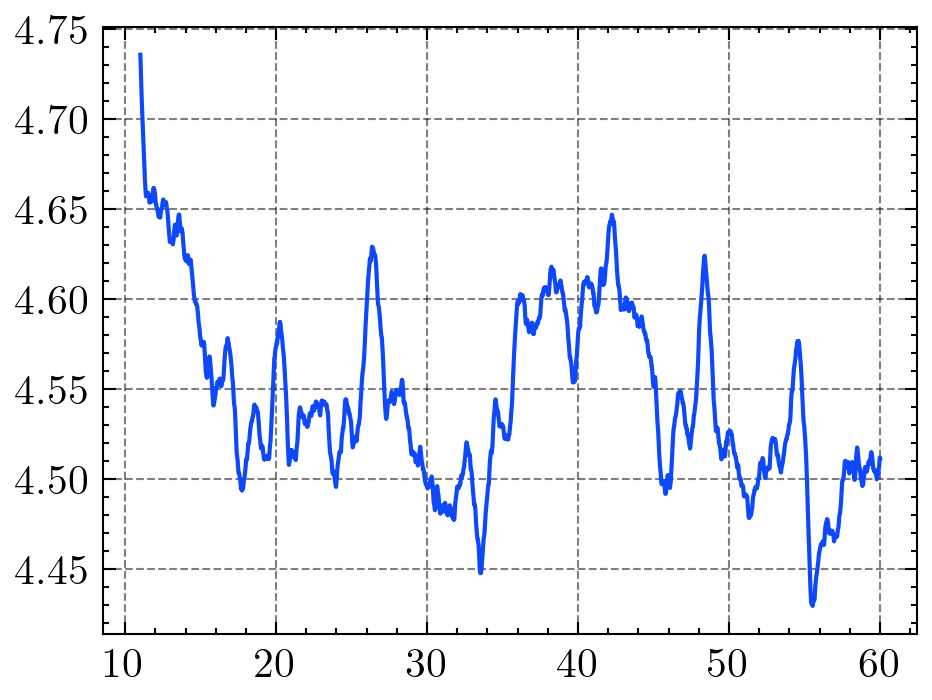

In [9]:
tdf = B3_C5_data.query("real_time > 11")
plt.plot(tdf["real_time"], tdf["z"])
plt.show

tdf.iloc[:,[1,4]].head(20)

# 11.05 settling time to final value of 4.5

time_step  real_time         x         y         z       phi     theta  \
735         735       7.35 -0.002226  0.216014  5.249231  2.217541  2.149696   
736         736       7.36 -0.001732  0.219843  5.247631  2.127582  2.162541   
737         737       7.37 -0.001377  0.223820  5.247259  2.023438  2.171110   
738         738       7.38 -0.001096  0.227883  5.246496  1.924387  2.184081   
739         739       7.39 -0.000898  0.232037  5.245529  1.825709  2.190763   
...         ...        ...       ...       ...       ...       ...       ...   
5997       5997      59.97 -0.737836 -0.020859  4.979809  4.027061 -5.524756   
5998       5998      59.98 -0.734631 -0.026347  4.980616  4.112400 -5.470534   
5999       5999      59.99 -0.731277 -0.031714  4.981307  4.192666 -5.410600   
6000       6000      60.00 -0.727828 -0.037000  4.981307  4.271126 -5.347225   
6001       6001      60.01 -0.724243 -0.042171  4.981083  4.354420 -5.274902   

           psi    reward  total_reward  
735   1.734524  0.930624    451.785443  
736   1.713919  0.930400    452.715844  
737   1.693602  0.930433    453.646277  
738   1.669796  0.930520    454.576797  
739   1.650340  0.930475    455.507273  
...        ...       ...           ...  
5997  2.765405  0.930438   5417.240945  
5998  2.722989  0.930753   5418.171697  
5999  2.679560  0.931046   5419.102744  
6000  2.638062  0.930807   5420.033550  
6001  2.594016  0.931154   5420.964705  

[5267 rows x 10 columns]

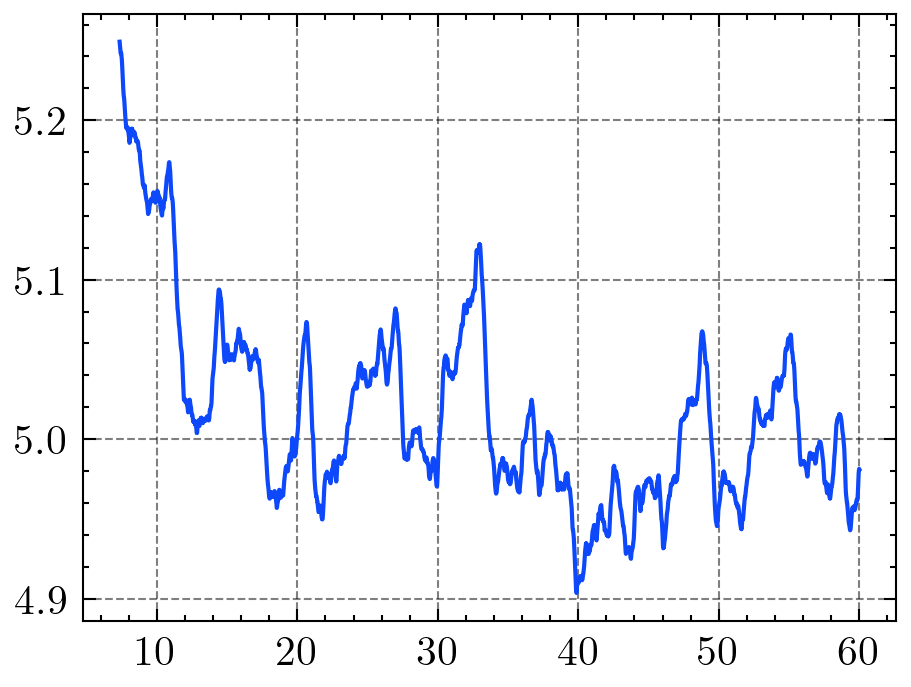

In [61]:
# RL z freq and amplitude cals

tdf = B3_C1_data.query("z < 5.25 ")
plt.plot(tdf["real_time"], tdf["z"])
plt.show
tdf

4.865

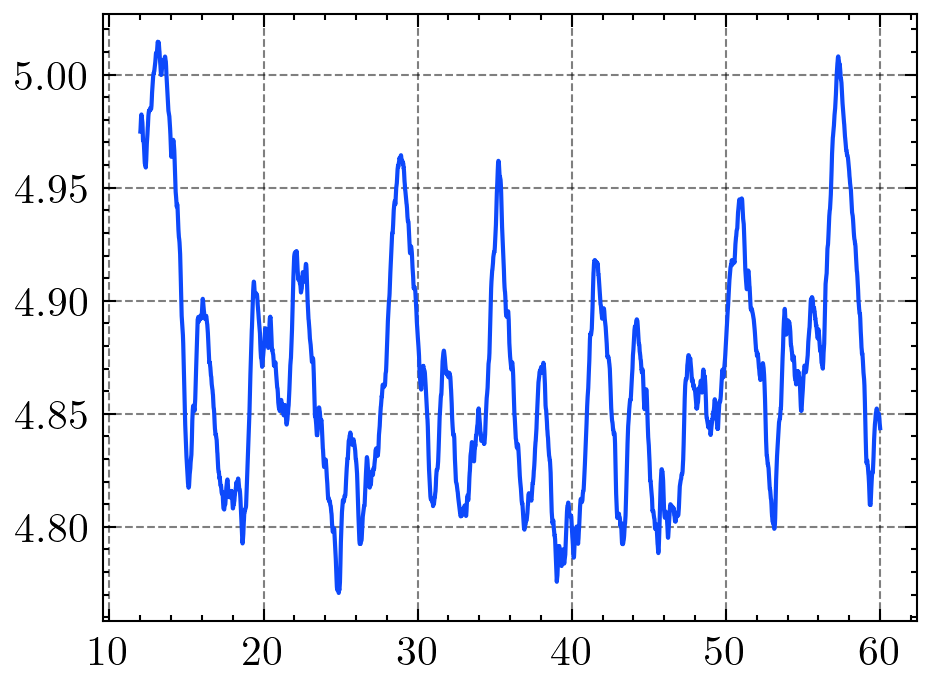

In [54]:
# RL z freq and amplitude cals

tdf = B1_C1_data.query("real_time > 12 ")
plt.plot(tdf["real_time"], tdf["z"])
plt.show
y_final = 4.78 + (4.95-4.78)/2
y_final

In [ ]:
# PID z freq and amplitude cals

tdf = PID_data.query("real_time > 10")
plt.plot(tdf["real_time"], tdf["z"])
plt.show

In [ ]:
tdf = PID_data
plt.plot(tdf["real_time"], tdf["phi"])
plt.show
tdf

In [ ]:
# DATA FOR RL

time_period = 3.41
frequency = 1/time_period
settling_time = 6.63

frequency

# s1 =
#          RiseTime: 5.39505911370009
#     TransientTime: 6.67184064573636
#      SettlingTime: 6.67184064573636
#       SettlingMin: 4.7707586
#       SettlingMax: 5.2981057
#         Overshoot: 7.64138000000001
#        Undershoot: 0
#              Peak: 3.2292414
#          PeakTime: 24.88
# tolerance set to 0.08


In [ ]:
# PID REPOSNSE


# s2 =
#          RiseTime: 2.18694815670258
#     TransientTime: 3.13140883046849
#      SettlingTime: 3.13140883046849
#       SettlingMin: 4.9998674
#       SettlingMax: 5.2975492
#         Overshoot: 0.00441999999998277
#        Undershoot: 0
#              Peak: 3.0001326
#          PeakTime: 28.5
# tolernace set to 0.05

## B.1 Different Magnitudes

Plotting Data


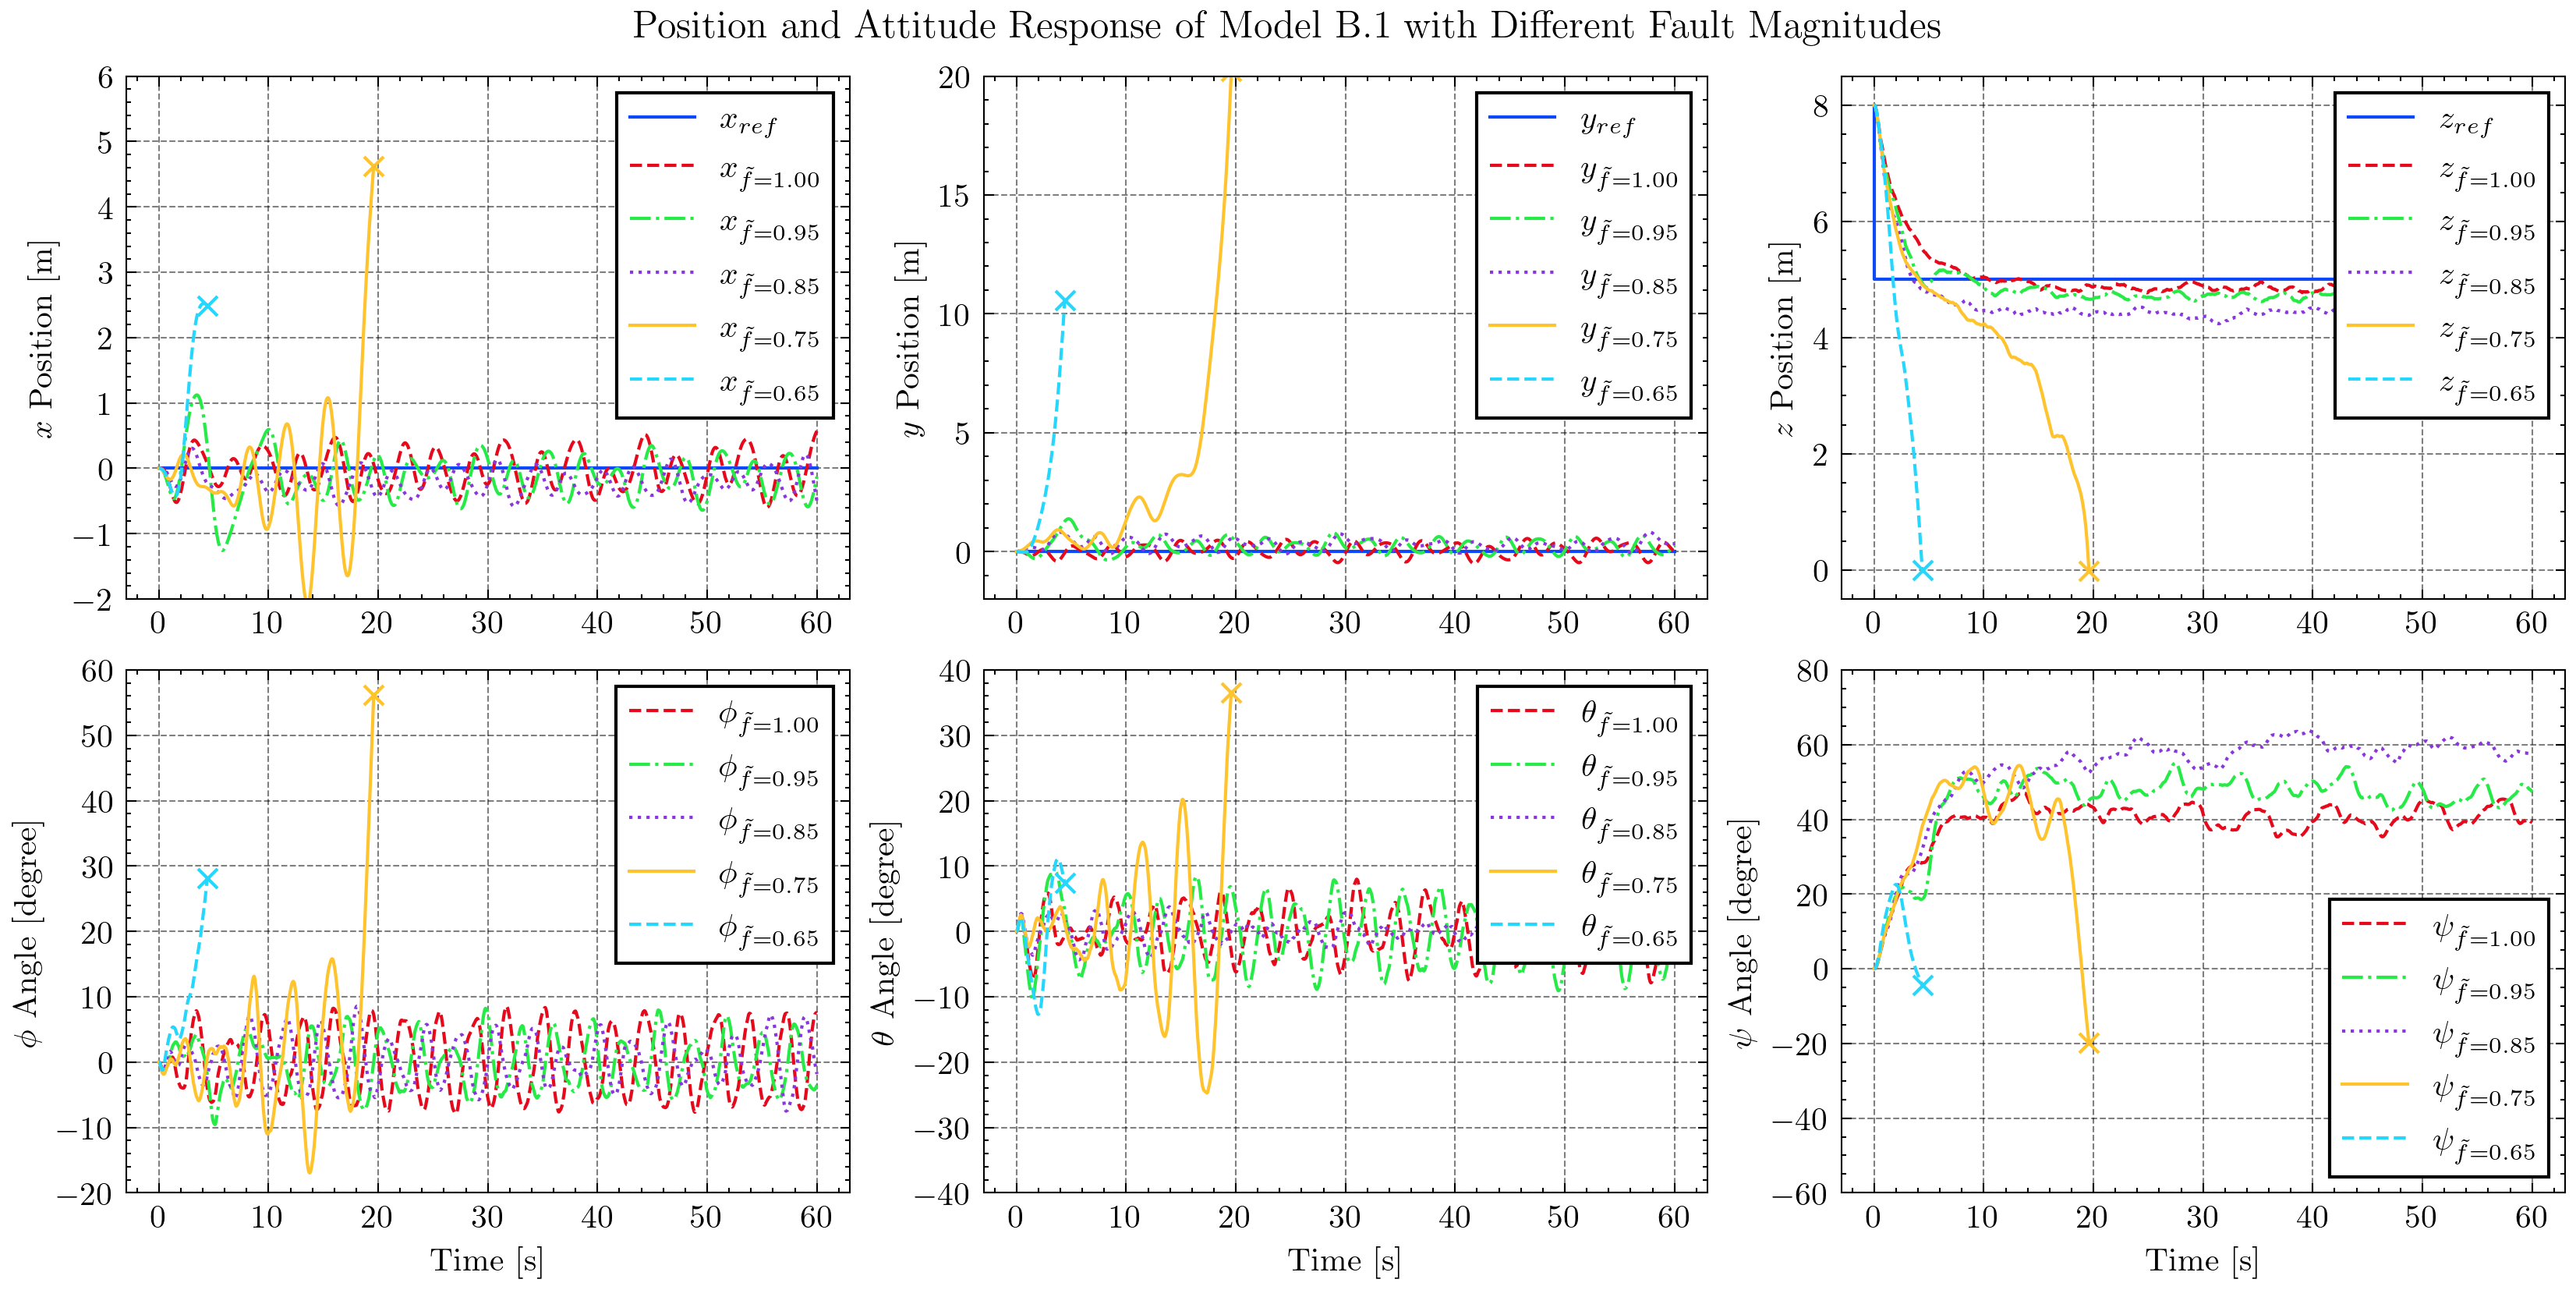

Closing Plots


In [3]:

B1_1_00_data = pd.read_csv("../experimentation/rewardModels/modelB/data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000.csv")
B1_0_95_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_95.csv")
B1_0_85_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_85.csv")
B1_0_75_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_75.csv")
B1_0_65_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_65.csv")
B1_0_55_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_55.csv")


B1_0_63_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_63.csv")

B1_1_00_data = cleanData(B1_1_00_data)
B1_0_95_data = cleanData(B1_0_95_data)
B1_0_85_data = cleanData(B1_0_85_data)
B1_0_75_data = cleanData(B1_0_75_data)
B1_0_65_data = cleanData(B1_0_65_data)
B1_0_55_data = cleanData(B1_0_55_data)

B1_0_63_data = cleanData(B1_0_63_data)


datas = [
    B1_1_00_data,
    #B1_0_95_data,
    B1_0_85_data,
    #B1_0_75_data,
    B1_0_65_data,
    B1_0_63_data,
    B1_0_55_data,
]

ftildes = ["1.00", "0.95", "0.85", "0.75", "0.65"]

symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-2, 6],
    [-2, 20],
    [-0.5, 8.5],
    [-20, 60],
    [-40, 40],
    [-60, 80],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(11, 5.5), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        for data_i, data in enumerate(datas):
            line = ax[row, col].plot(data.iloc[:, 1], data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{\\tilde{f}="+ ftildes[data_i] +"}$")

            if data_i >= 3:
                final_point = data.iloc[-1, [1, i + 2]]
                ax[row, col].plot(final_point[0], final_point[1], 'x', color=line[0].get_color())



        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 1 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

text = "All models with $\\tilde{f} \le 0.50$," \
       "\n fail within 5 seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
#fig.text(0.76, 0.66, text, fontsize=10, bbox=bbox, transform=fig.transFigure)



plt.suptitle("Position and Attitude Response of Model B.1 with Different Fault Magnitudes")

plt.savefig(f'images/differentFaultMagnitudeComparisonB1-v2.pdf', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


Plotting Data


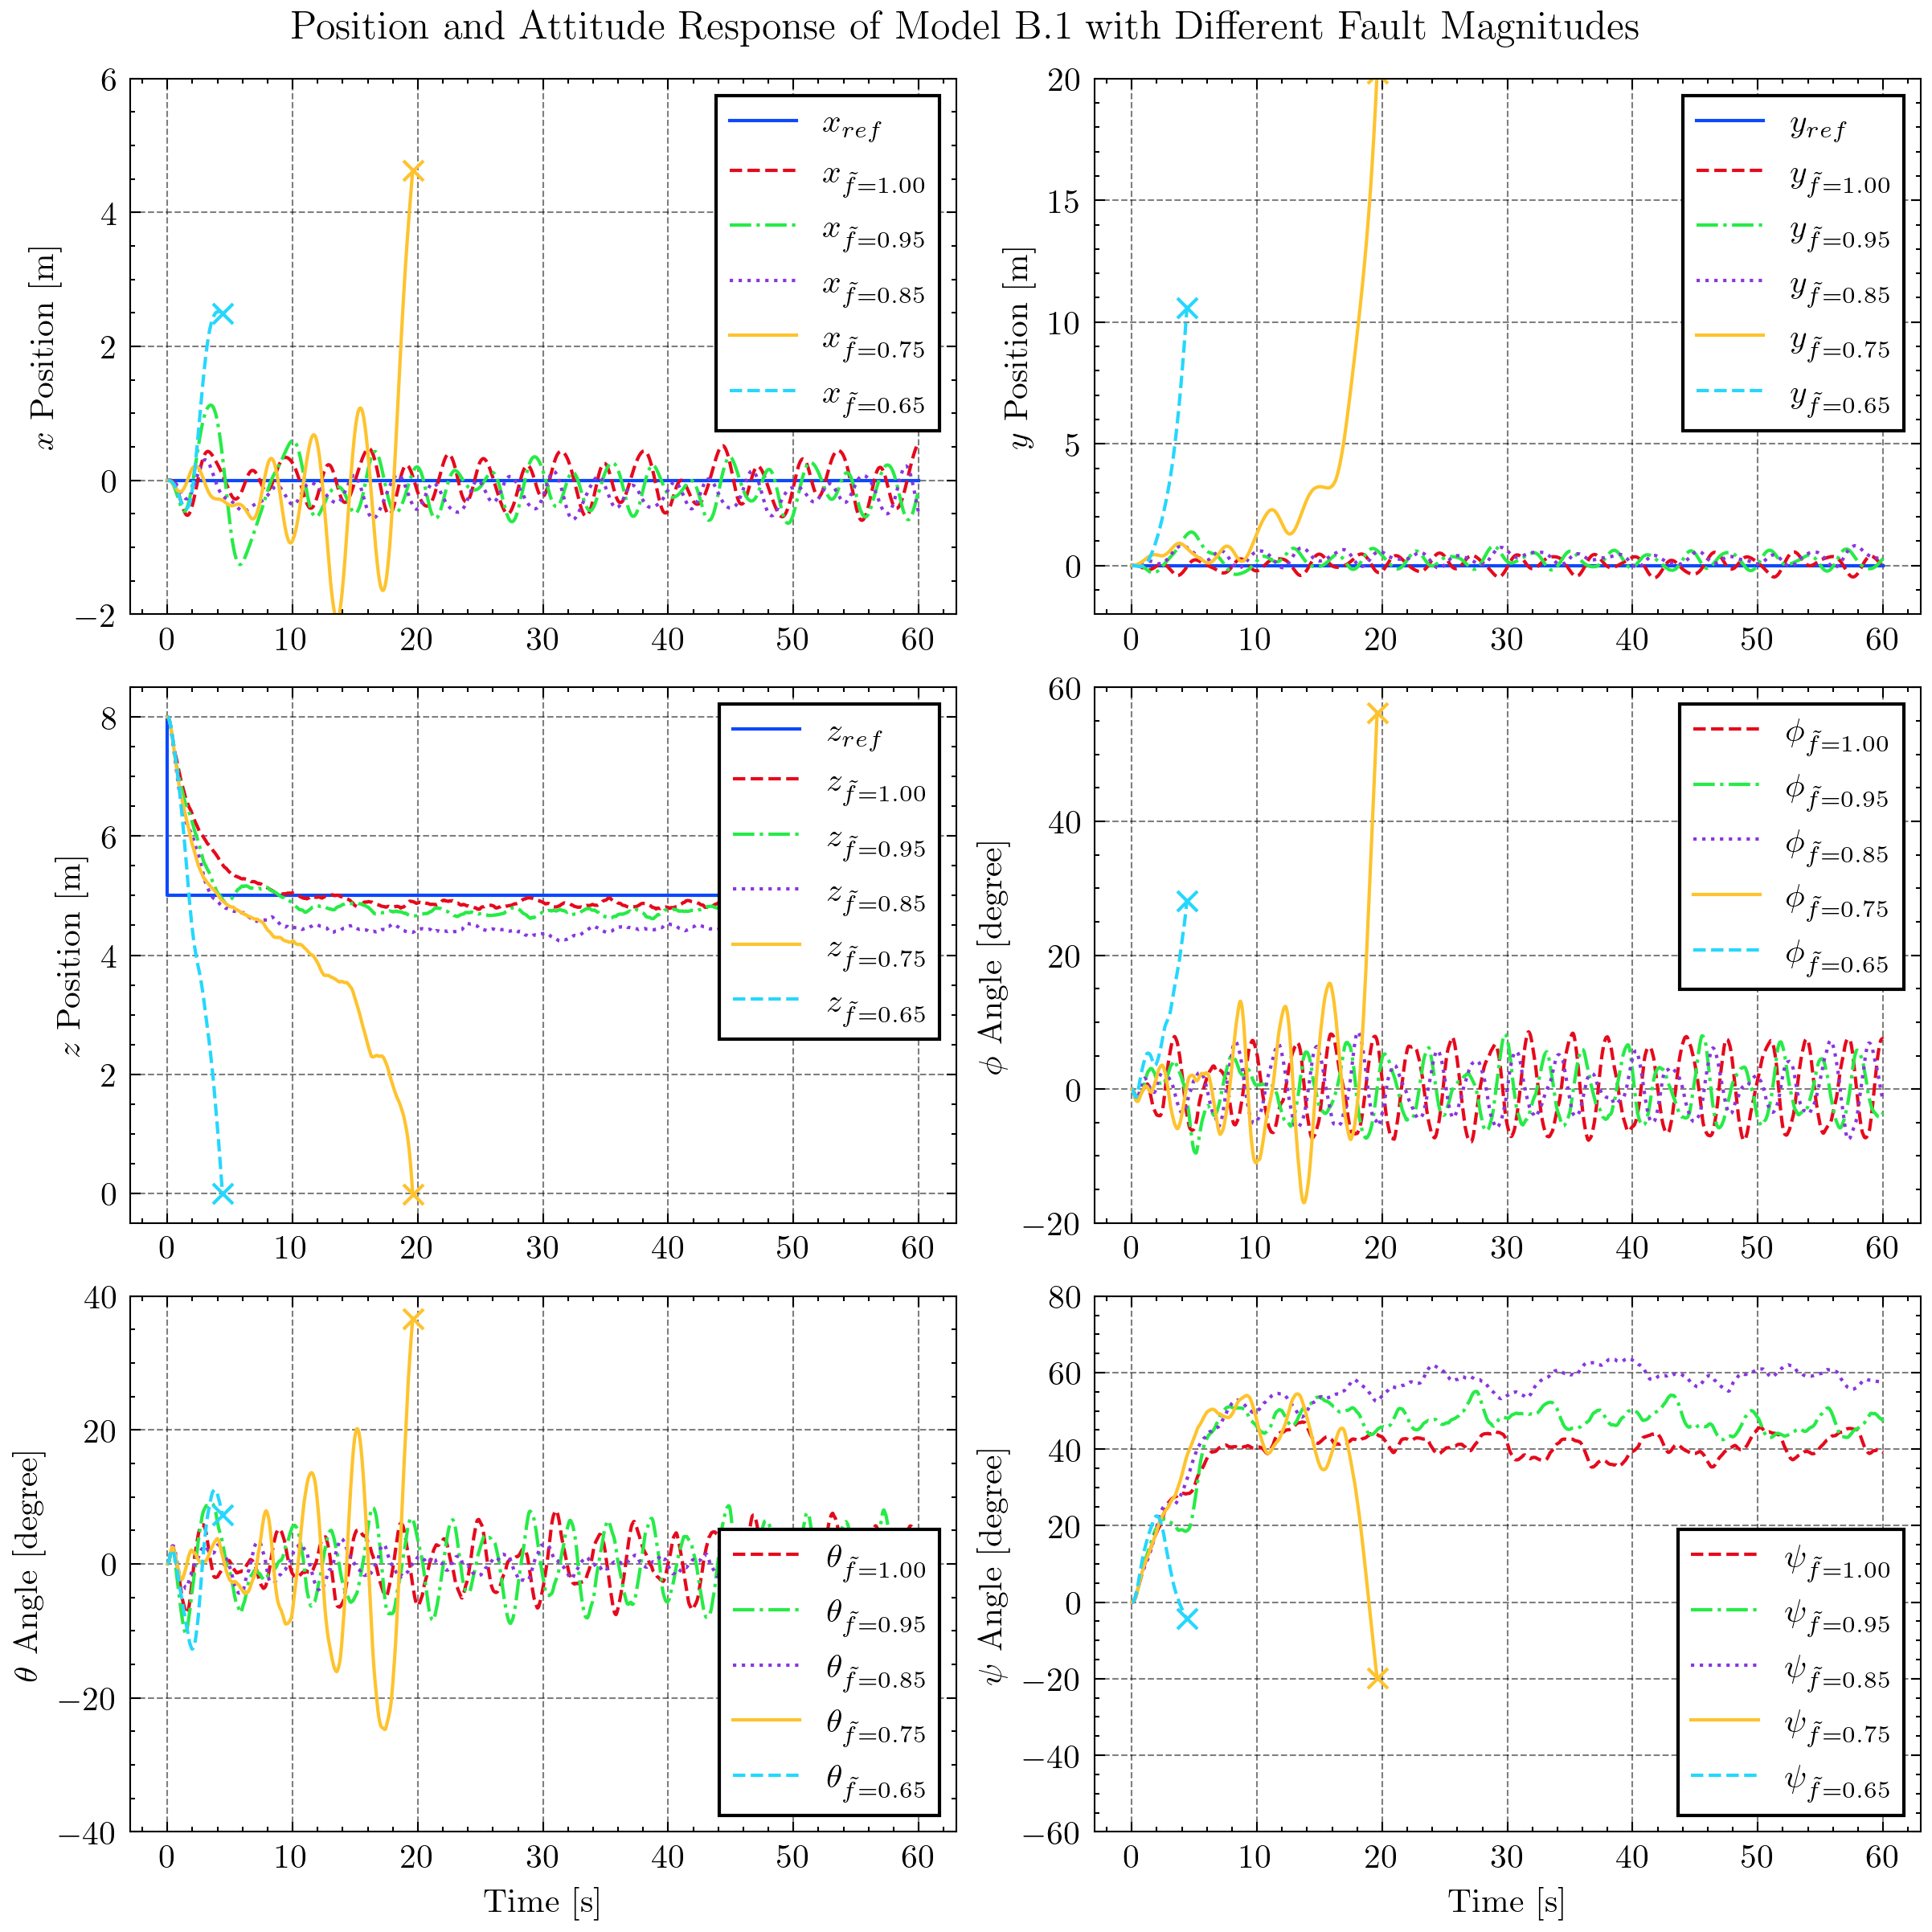

Closing Plots


In [3]:

B1_1_00_data = pd.read_csv("../experimentation/rewardModels/modelB/data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000.csv")
B1_0_95_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_95.csv")
B1_0_85_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_85.csv")
B1_0_75_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_75.csv")
B1_0_65_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_65.csv")
B1_0_55_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_55.csv")


B1_0_63_data = pd.read_csv("data/RL-ModelB_V1_1,position_sigma_0_25,attitude_sigma_0_62832,run_1-2000000-Case5-ftilde_0_63.csv")

B1_1_00_data = cleanData(B1_1_00_data)
B1_0_95_data = cleanData(B1_0_95_data)
B1_0_85_data = cleanData(B1_0_85_data)
B1_0_75_data = cleanData(B1_0_75_data)
B1_0_65_data = cleanData(B1_0_65_data)
B1_0_55_data = cleanData(B1_0_55_data)

B1_0_63_data = cleanData(B1_0_63_data)


datas = [
    B1_1_00_data,
    #B1_0_95_data,
    B1_0_85_data,
    #B1_0_75_data,
    B1_0_65_data,
    B1_0_63_data,
    B1_0_55_data,
]

ftildes = ["1.00", "0.95", "0.85", "0.75", "0.65"]

symbols = [
    "x",
    "y",
    "z",
    "\phi",
    "\\theta",
    "\psi",
]

ylims = [
    [-2, 6],
    [-2, 20],
    [-0.5, 8.5],
    [-20, 60],
    [-40, 40],
    [-60, 80],
]
ylabels = [
    f"${symbols[0]}$ Position [m]",
    f"${symbols[1]}$ Position [m]",
    f"${symbols[2]}$ Position [m]",
    f"${symbols[3]}$ Angle [degree]",
    f"${symbols[4]}$ Angle [degree]",
    f"${symbols[5]}$ Angle [degree]",
]

reference_signals = [
    [[0, 60], [0, 0]],
    [[0, 60], [0, 0]],
    [[0, 0, 60], [8, 5, 5]],
    [],
    [],
    [],
]

plt.style.use(['science', 'grid', 'high-vis'])

rows = 3
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(8, 8), sharex='row', layout="constrained")

i = 0

print("Plotting Data")
for row in range(rows):
    for col in range(cols):
        if i in [0, 1, 2,]:
            ax[row, col].plot(reference_signals[i][0], reference_signals[i][1],
                              label="$" + symbols[i] + "_{ref}$")
        else:
            next(ax[row, col]._get_lines.prop_cycler)


        for data_i, data in enumerate(datas):
            line = ax[row, col].plot(data.iloc[:, 1], data.iloc[:, i + 2],
                          label="$" + symbols[i] + "_{\\tilde{f}="+ ftildes[data_i] +"}$")

            if data_i >= 3:
                final_point = data.iloc[-1, [1, i + 2]]
                ax[row, col].plot(final_point[0], final_point[1], 'x', color=line[0].get_color())



        ax[row, col].set_xlabel("Time [s]", fontsize=10) if row == 2 else None
        ax[row, col].set_ylabel(ylabels[i], fontsize=10)
        ax[row, col].set_ylim(ylims[i])
        ax[row, col].tick_params(axis='both', which='major', labelsize=10)
        ax[row, col].legend(fontsize=10, fancybox=False, edgecolor='black')

        i += 1

text = "All models with $\\tilde{f} \le 0.50$," \
       "\n fail within 5 seconds."
bbox = dict(facecolor='white', edgecolor='black', alpha=0.8)
#fig.text(0.76, 0.66, text, fontsize=10, bbox=bbox, transform=fig.transFigure)



plt.suptitle("Position and Attitude Response of Model B.1 with Different Fault Magnitudes")

plt.savefig(f'images/differentFaultMagnitudeComparisonB1-v3.pdf', dpi=300)
plt.show()

print("Closing Plots")
plt.close(fig)


In [78]:
# datas = [
#     B1_1_00_data,
#     #B1_0_95_data,
#     B1_0_85_data,
#     #B1_0_75_data,
#     B1_0_65_data,
#     B1_0_63_data,
#     B1_0_55_data,
# ]

# B1_0_85_data.query("real_time > 10")['z'].describe()
B1_0_55_data.tail()



time_step  real_time         x          y         z        phi     theta  \
436        436       4.36  2.500669  10.277226  0.099029  27.376290  7.694722   
437        437       4.37  2.498960  10.352521  0.071886  27.566297  7.616178   
438        438       4.38  2.497189  10.428332  0.044868  27.759699  7.527234   
439        439       4.39  2.495364  10.504634  0.017918  27.945922  7.441360   
440        440       4.40  2.493417  10.581836 -0.008214  28.150221  7.358515   

          psi    reward  total_reward  
436 -4.149031  0.288522    194.595651  
437 -4.211087  0.288088    194.883739  
438 -4.266259  0.288973    195.172712  
439 -4.317929  0.287465    195.460177  
440 -4.370470  0.287418    195.747595

In [76]:

B1_0_65_data.query("real_time > 10")['z'].describe()

count    5001.000000
mean        4.428781
std         0.053243
min         4.240412
25%         4.403757
50%         4.430624
75%         4.463431
max         4.536306
Name: z, dtype: float64